In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
#pip install vaex

In [4]:
#pip install category_encoders

### Importing the libraries

In [5]:
import numpy as np
import pandas as pd 
import seaborn as sns
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
import vaex
import vaex.ml

%matplotlib inline
sns.set_theme(context='notebook', style='darkgrid', font='sans-serif', font_scale=1, color_codes=True, rc=None)
plt.style.use("dark_background")

### Import the dataset

In [6]:
df = pd.read_csv("/Users/leo/Documents/universita/Machine Learning/Project/popularity_score_dataset.csv")
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [7]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [8]:
# Drop the "Unnamed: 0" column automatically generated by Google colab
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


### EDA

1. Have a general look at the dataset: use df.head() and try to understand what the columns are saying. It is a good practice to write down the columns and their measurement.
2. Look at the summary statistics of the data: use df.describe() to get a quick overview of the central tendency, dispersion, and shape of the distribution of each variable.
3. Check for errors: count the Not a Number (NaN) values in the DataFrame using df.isnull().sum()
4. Check for duplicate records: use df.duplicated().sum() to count the number of duplicates
5. Correlation: use df.corr() to compute the Pearson Correlation matrix of the columns. Visualize the correlation matrix using a heatmap.
6. Plot the distribution: How is your data distributed? It may happen that some variables have some kind of skewed/asymmetric/broad distribution. Check for the distribution by using df.plot(kind='hist') or df.plot(kind='kde') for a more detailed representation.
7. Plot the relationship between variables: use seaborn's scatterplot (sns.scatterplot) to understand the relationship between the columns.

#### 1.Header

In [9]:
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


We set the "track_id" column as index because it represents a unique identifier of each track

Variables description

● track_id: A unique identifier for each track.

● artists: The artists who performed the track. A single track can have multiple artists,
separated by a comma.

● album_name: The name of the album that the track appears on.

● track_name: The name of the track.

● popularity: The popularity score of the track, ranging from 0 to 100.

● duration_ms: The duration of the track in milliseconds.

● explicit: A binary value indicating whether the track contains explicit lyrics.

● danceability: A score indicating how danceable the track is, ranging from 0 to 1.

● energy: A score indicating the energy level of the track, ranging from 0 to 1.

● key: The key that the track is in (e.g., C, D, E, etc.).

● loudness: The loudness of the track in decibels (dB).

● mode: The mode of the track (major or minor).

● speechiness: A score indicating how much speech-like content is in the track, ranging
from 0 to 1.

● acousticness: A score indicating how acoustic the track is, ranging from 0 to 1.

● instrumentalness: A score indicating how instrumental the track is, ranging from 0 to 1.

● liveness: A score indicating the presence of an audience in the recording, ranging from 0
to 1.

● valence: A score indicating the positivity of the track, ranging from 0 to 1.

● tempo: The tempo of the track in beats per minute (BPM).

● time_signature: The time signature of the track (e.g., 4/4, 3/4, etc.).

● track_genre: The genre of the track (if available).

In [10]:
#let's see all the different track genre
df['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

#### 2.Description

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

We can see that 
- There are 18 features for 114000 observation
- There are 3 Null value, one each for the first 3 columns
- There are 4 categorical columns (first three and the last one) and one boolean column ("explicit"). 

In [12]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


We can see that:
- Variables have different scale and range

#### 3.Check for non valid values

In [13]:
df.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

#### 4.Check for duplicates

In [14]:
df.duplicated().sum()

450

In the features description part it is written that the "track_id" is unique for each song but we can see that:

In [15]:
# Check first the total number of observation and then the number of unique "track_id"
print("Total number of observation:" + str(len(df["track_id"])))
print("Total number of observation:" + str(df['track_id'].nunique()))

Total number of observation:114000
Total number of observation:89741


I can see that out of a total of 113,549 observations, only 89,740 are unique

#### 5.Correlation

In [16]:
df.corr()

/var/folders/fn/cfz1v8ln76s58pxjvj3vk_hh0000gn/T/ipykernel_7224/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
popularity,1.000000,-0.007101,0.044082,0.035448,0.001056,-0.003853,0.050423,-0.013931,-0.044927,-0.025472,-0.095139,-0.005387,-0.040534,0.013205,0.031073
duration_ms,-0.007101,1.000000,-0.065263,-0.073426,0.058523,0.008114,-0.003470,-0.035556,-0.062600,-0.103788,0.124371,0.010321,-0.154479,0.024346,0.018225
explicit,0.044082,-0.065263,1.000000,0.122507,0.096955,0.004484,0.108588,-0.037212,0.307952,-0.094403,-0.103404,0.032549,-0.003381,-0.002816,0.038386
danceability,0.035448,-0.073426,0.122507,1.000000,0.134325,0.036469,0.259077,-0.069219,0.108626,-0.171533,-0.185606,-0.131617,0.477341,-0.050450,0.207218
energy,0.001056,0.058523,0.096955,0.134325,1.000000,0.048006,0.761690,-0.078362,0.142509,-0.733906,-0.181879,0.184796,0.258934,0.247851,0.187126
key,-0.003853,0.008114,0.004484,0.036469,0.048006,1.000000,0.038590,-0.135916,0.020418,-0.040937,-0.006823,-0.001600,0.034103,0.010917,0.015065
loudness,0.050423,-0.003470,0.108588,0.259077,0.761690,0.038590,1.000000,-0.041764,0.060826,-0.589803,-0.433477,0.076899,0.279848,0.212446,0.191992
mode,-0.013931,-0.035556,-0.037212,-0.069219,-0.078362,-0.135916,-0.041764,1.000000,-0.046532,0.095553,-0.049955,0.014012,0.021953,0.000566,-0.024092
speechiness,-0.044927,-0.062600,0.307952,0.108626,0.142509,0.020418,0.060826,-0.046532,1.000000,-0.002186,-0.089616,0.205219,0.036635,0.017273,-0.000011
acousticness,-0.025472,-0.103788,-0.094403,-0.171533,-0.733906,-0.040937,-0.589803,0.095553,-0.002186,1.000000,0.104027,-0.020700,-0.107070,-0.208224,-0.176138


/var/folders/fn/cfz1v8ln76s58pxjvj3vk_hh0000gn/T/ipykernel_7224/1333875543.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<AxesSubplot: >

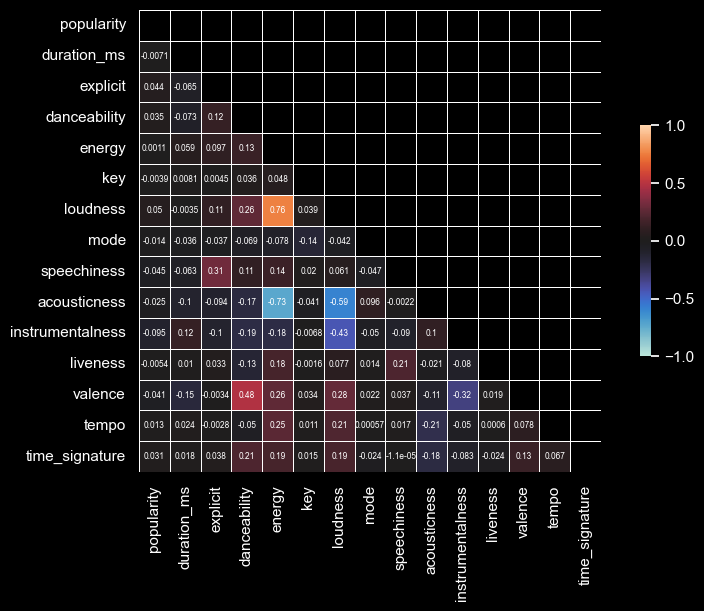

In [17]:
# Plotting the diagonal correlation matrix

# Compute correlation matrix
corr_matrix = df.corr()

# Generate a mask for the upper triangle. In order to visualize the diagonal 
# correlation matrix and not the entire once.
mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) 

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, mask=mask, vmax= 1, vmin= -1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot_kws={'fontsize': 6})

#### 6.Plot the distribution

array([[<AxesSubplot: title={'center': 'popularity'}>,
        <AxesSubplot: title={'center': 'duration_ms'}>,
        <AxesSubplot: title={'center': 'danceability'}>,
        <AxesSubplot: title={'center': 'energy'}>],
       [<AxesSubplot: title={'center': 'key'}>,
        <AxesSubplot: title={'center': 'loudness'}>,
        <AxesSubplot: title={'center': 'mode'}>,
        <AxesSubplot: title={'center': 'speechiness'}>],
       [<AxesSubplot: title={'center': 'acousticness'}>,
        <AxesSubplot: title={'center': 'instrumentalness'}>,
        <AxesSubplot: title={'center': 'liveness'}>,
        <AxesSubplot: title={'center': 'valence'}>],
       [<AxesSubplot: title={'center': 'tempo'}>,
        <AxesSubplot: title={'center': 'time_signature'}>,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

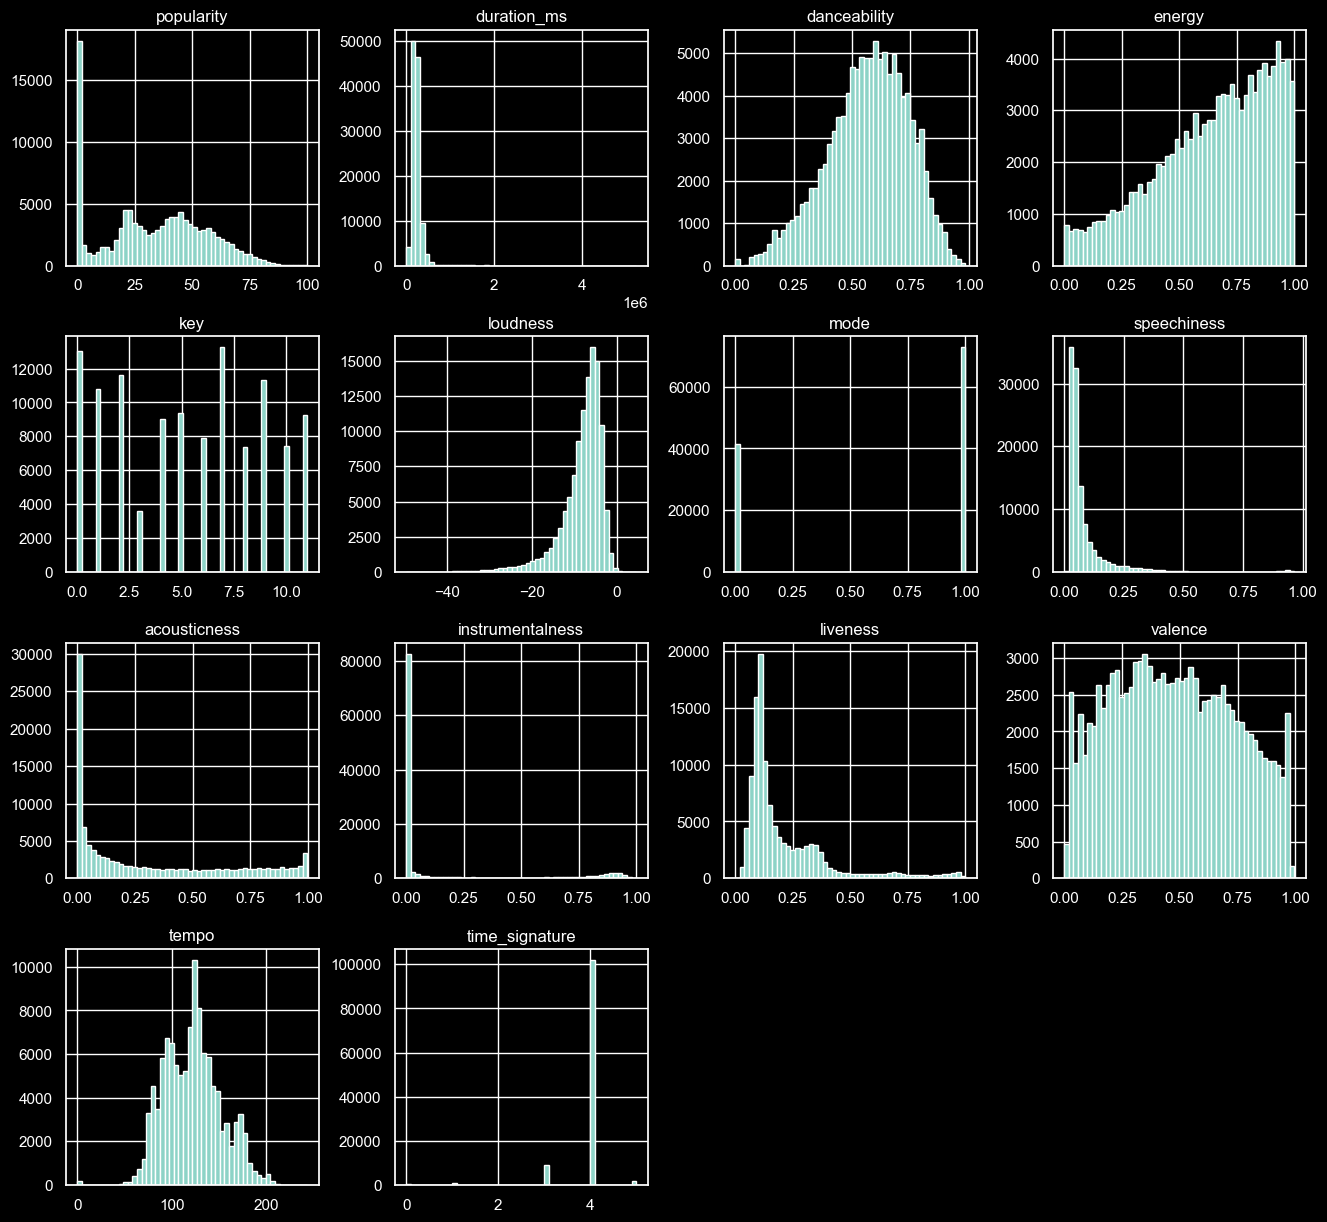

In [18]:
# Plot the distribution of each feature 
df.hist(bins=50, figsize=(16,15))

We can see that:
- Also the "mode" variable is boolean.
- The "time_singature" variable is a discrete variable [0,5]

In [19]:
# Count the recurrent observation of track genre
print(df['track_genre'].describe())
df['track_genre'].value_counts()

count       114000
unique         114
top       acoustic
freq          1000
Name: track_genre, dtype: object


acoustic             1000
punk-rock            1000
progressive-house    1000
power-pop            1000
pop                  1000
                     ... 
folk                 1000
emo                  1000
electronic           1000
electro              1000
world-music          1000
Name: track_genre, Length: 114, dtype: int64

We can see that there 114 different genres, in the dataset there are 1000 tracks for every type of genres

#### 7.Plot the relationship between variables

Top 10 track genres in relation to popularity score 

In [20]:
# Pass the "popularity" and "track_genre" columns as lists
popularity_scores = df["popularity"]
genres = df["track_genre"]

# Create a dictionary "genre_scores" that store the cumulative popularity score
genre_scores = {}
for i in range(len(popularity_scores)):
    genre = genres[i]
    score = popularity_scores[i]
    if genre in genre_scores:
        genre_scores[genre] += score
    else:
        genre_scores[genre] = score

# Print the sorted list of the top 10 track genres
top_genres = sorted(genre_scores.items(), key=lambda x: x[1], reverse=True)[:10]
print(top_genres)

[('pop-film', 59283), ('k-pop', 56896), ('chill', 53651), ('sad', 52379), ('grunge', 49594), ('indian', 49539), ('anime', 48772), ('emo', 48128), ('sertanejo', 47866), ('pop', 47576)]


Text(0, 0.5, 'Cumulative popularity score')

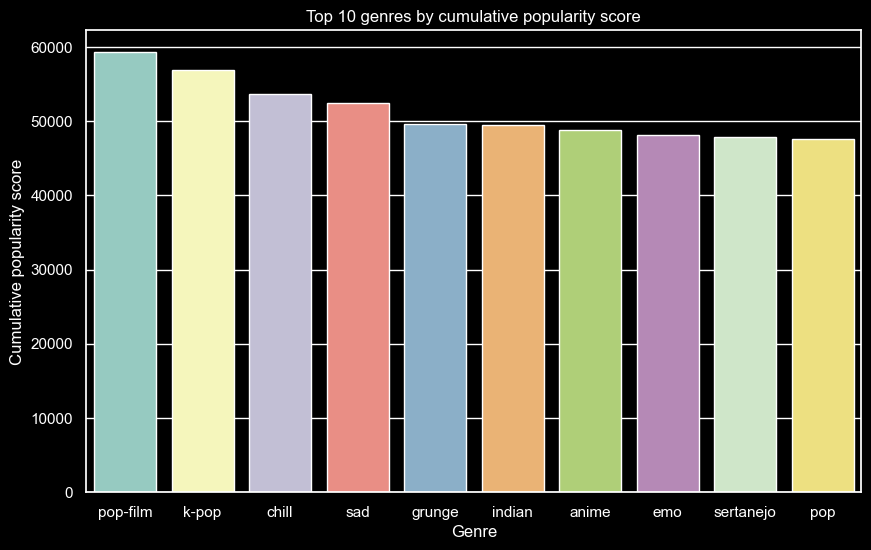

In [21]:
# Extract the genres and scores for the top 10 (fonte: "https://www.kaggle.com/code/cnic92/spotify-songs-attributes-eda")
top_genre_names = [genre[0] for genre in top_genres]
top_genre_scores = [genre[1] for genre in top_genres]

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))

# Make a barplot of them
sns.barplot(x=top_genre_names, y=top_genre_scores)

ax.set_title('Top 10 genres by cumulative popularity score')
ax.set_xlabel('Genre', fontsize=12)
ax.set_ylabel('Cumulative popularity score')

Let's investigate the most powerful correlation between variables 

<AxesSubplot: xlabel='energy', ylabel='loudness'>

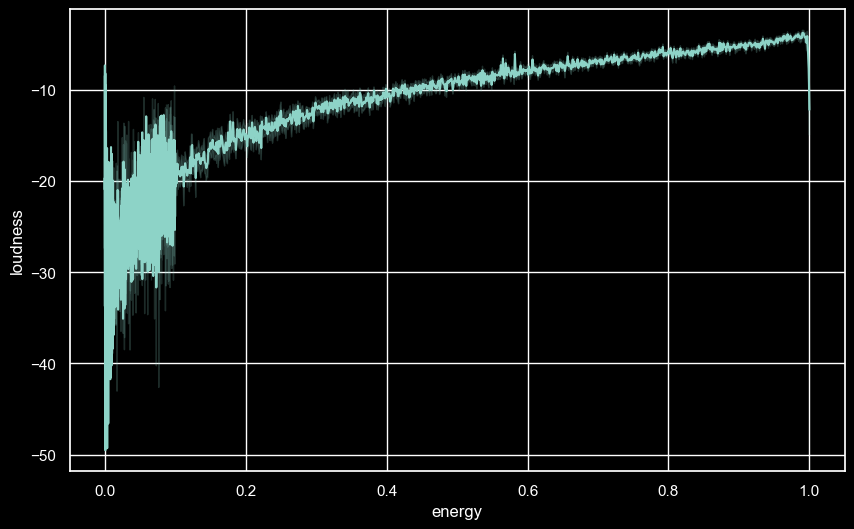

In [22]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))

# Create the lineplot
sns.lineplot(x="energy", y="loudness", data=df)

<AxesSubplot: xlabel='energy', ylabel='acousticness'>

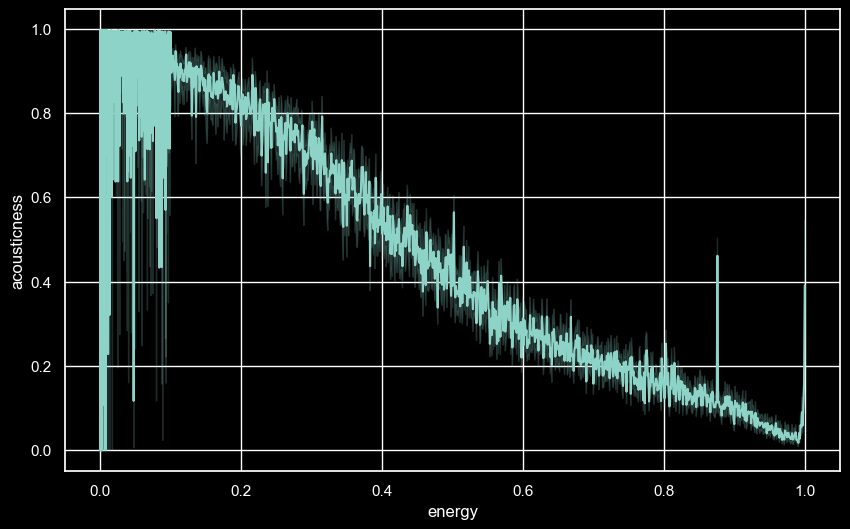

In [23]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))

# Create the lineplot
sns.lineplot(x="energy", y="acousticness", data=df)

<AxesSubplot: xlabel='valence', ylabel='danceability'>

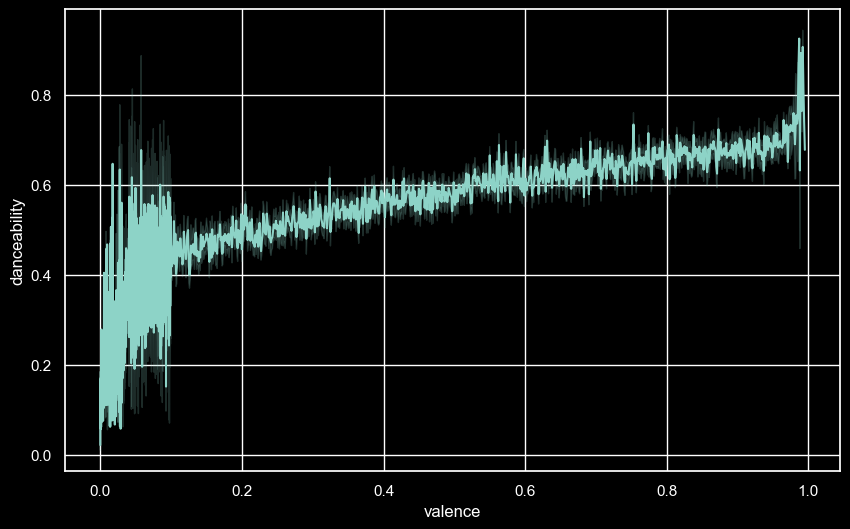

In [24]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))

# Create the lineplot
sns.lineplot(x="valence", y="danceability", data=df)

We can see that the most powerful correlation concerns there is a positive correlation between "loudness" and "energy" negatively correlated with "acousticness" and "instrumentalness". There is also a positive correlation between "valence" and "danceability". 

## Data Cleaning

#### Handling null value

I have only 3 null values, so I decide to drop them

In [25]:
df.dropna(inplace=True)

#### Handling duplicates

I decide to drop all the duplicates, because they could lead to an incorrect analysis

In [26]:
df.drop_duplicates(inplace=True)

In [27]:
# Check whether the two operations have been correctly carried out  
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113549 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113549 non-null  object 
 1   artists           113549 non-null  object 
 2   album_name        113549 non-null  object 
 3   track_name        113549 non-null  object 
 4   popularity        113549 non-null  int64  
 5   duration_ms       113549 non-null  int64  
 6   explicit          113549 non-null  bool   
 7   danceability      113549 non-null  float64
 8   energy            113549 non-null  float64
 9   key               113549 non-null  int64  
 10  loudness          113549 non-null  float64
 11  mode              113549 non-null  int64  
 12  speechiness       113549 non-null  float64
 13  acousticness      113549 non-null  float64
 14  instrumentalness  113549 non-null  float64
 15  liveness          113549 non-null  float64
 16  valence           11

# Dealing with Zeros

In [28]:
# creating a dataframe with only songs with zeros
df0=df[df['popularity']==0]
df0

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
23,0BUuuEvNa5T4lMaewyiudB,Jason Mraz,Coffee Moment,93 Million Miles,0,216386,False,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,4,acoustic
24,3Hn3LfhrQOaKihdCibJsTs,Jason Mraz,Human - Best Adult Pop Tunes,Unlonely,0,231266,False,0.796,0.667,5,-4.831,0,0.0392,0.3810,0.000000,0.2210,0.754,97.988,4,acoustic
26,5IfCZDRXZrqZSm8AwE44PG,Jason Mraz,Holly Jolly Christmas,Winter Wonderland,0,131760,False,0.620,0.309,5,-9.209,1,0.0495,0.7880,0.000000,0.1460,0.664,145.363,4,acoustic
27,0dzKBptH2P5j5a0MifBMwM,Jason Mraz,Feeling Good - Adult Pop Favorites,If It Kills Me,0,273653,False,0.633,0.429,4,-6.784,0,0.0381,0.0444,0.000000,0.1320,0.520,143.793,4,acoustic
28,5QAMZTM5cmLg3fHX9ZbTZi,Jason Mraz,Christmas Time,Winter Wonderland,0,131760,False,0.620,0.309,5,-9.209,1,0.0495,0.7880,0.000000,0.1460,0.664,145.363,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113046,3W73vndiqDkaYwYjSMaSWu,Rend Collective,Santa's Christmas List,Ding Dong Merrily On High (The Celebration's S...,0,117226,False,0.696,0.715,7,-7.741,1,0.0314,0.3400,0.000000,0.1800,0.959,130.021,4,world-music
113047,18FIFh4AGPC2zDLLFkJp4j,Kim Walker-Smith,Santa's Christmas List,Rudolph The Red-Nosed Reindeer,0,175426,False,0.581,0.436,8,-7.936,1,0.0443,0.2320,0.000000,0.0547,0.412,120.138,4,world-music
113048,6xw4sP2mGqAtVYZkBojxcI,Kim Walker-Smith,Santa's Christmas List,I'll Be Home For Christmas,0,193653,False,0.413,0.437,1,-7.983,0,0.0327,0.0420,0.000036,0.1460,0.102,120.259,4,world-music
113049,6E7Ix5jkd6uzfoxuvcI8Ww,Rend Collective;We The Kingdom,Santa's Christmas List,God Rest Ye Merry Gentlemen (Hallelujah),0,217120,False,0.607,0.884,2,-4.059,1,0.0489,0.0230,0.000000,0.2260,0.555,139.988,4,world-music


Let's see if there are some artists thta have more songs with 0 as popularity score than a number different from 0

In [29]:
# which artists have the highest number of songs with 0 as popularity score?
artist_counts_0 = df0['artists'].value_counts().reset_index()
artist_names_list_0 = artist_counts_0['index'].tolist()
artist_names_list_0

['Stevie Wonder',
 'Ella Fitzgerald',
 'Chuck Berry',
 'The Beach Boys',
 'Norah Jones',
 'Bryan Adams',
 'Dean Martin',
 'Nat King Cole',
 'Peggy Lee',
 'The Prophet',
 'The Jackson 5',
 'Brenda Lee',
 'OneRepublic',
 'Don Omar',
 'Rob Zombie',
 'Jack Harlow',
 'Burna Boy',
 'The Supremes',
 'Tom Petty and the Heartbreakers',
 'Oleg Pogudin',
 'Jamie Cullum',
 'Wisin & Yandel',
 'Los Prisioneros',
 'Feid',
 'Weezer',
 'Daddy Yankee',
 'Vadim Kozin',
 'Jimmy Eat World',
 'Robert Schumann;Pavel Nersessian',
 'Marilyn Manson',
 'Mickie Krause',
 'Jhayco;Bad Bunny',
 'J Balvin',
 'Nikolay Kopylov',
 'Mabel',
 'The Temptations',
 'Kevin Roldan',
 'Sergei Lemeshev',
 'Mariah Angeliq',
 'The Platters',
 'Jhayco',
 'Royal Blood',
 'White Noise for Babies',
 'Justin Bieber',
 'Jhayco;Anuel AA',
 'salem ilese',
 'Spuntic',
 'Tiësto;Charli XCX',
 'Najand',
 'Eric Burdon',
 'Robin Schulz;David Guetta',
 'Cooltime Kids',
 'The Drifters',
 'Alessia Cara',
 'Otis Redding',
 'KAROL G',
 'Burna Boy;Ed

In [30]:
# which artists have the highest number of songs with popularity score >0?
df_artists_bigger_0=df[df['popularity']>0]
artist_counts = df_artists_bigger_0['artists'].value_counts().reset_index()
artist_names_list = artist_counts['index'].tolist()
artist_names_list

['The Beatles',
 'George Jones',
 'Linkin Park',
 'Prateek Kuhad',
 'Håkan Hellström',
 'my little airport',
 'Charlie Brown Jr.',
 'Elvis Presley',
 'Scooter',
 'BTS',
 'Feid',
 'Glee Cast',
 'Hank Williams',
 'Arctic Monkeys',
 'Red Hot Chili Peppers',
 'Vybz Kartel',
 'CoComelon',
 'Anupam Roy',
 'Seiko Matsuda',
 'OneRepublic',
 'Germaine Franco',
 'Hank Williams;Drifting Cowboys',
 'Eikichi Yazawa',
 'Eason Chan',
 'Daddy Yankee',
 'Almafuerte',
 'Maneva',
 'Lamb of God',
 'Jay Chou',
 'Little Symphony',
 'Rammstein',
 'Carlos Gardel',
 'Sujatha',
 'Pink Floyd',
 'BOØWY',
 'Napalm Death',
 'Nogizaka46',
 "Dan Gibson's Solitudes",
 'Sarah, the Illstrumentalist',
 'Nirvana',
 'Shiritsu Ebisu Chugaku',
 'Ritviz',
 'Yiruma',
 'Boris Brejcha',
 'PXNDX',
 'Hillsong Worship',
 'Alphaxone',
 'Robert Hood',
 'Exaltasamba',
 'Legião Urbana',
 'Carajo',
 'The Chemical Brothers',
 'The Prodigy',
 'Chris Tomlin',
 'Cigarettes After Sex',
 'XXXTENTACION',
 'Adele',
 'Wolfgang Amadeus Mozart;Dan

In [31]:
# let's create a list of artists thta have more songs with 0 popularity scorrs rateher than songs with pop score higher than zero
filtered_artist_names = []

for artist in artist_names_list_0:
    count_0 = artist_counts_0.loc[artist_counts_0['index'] == artist, 'artists'].values
    count = artist_counts.loc[artist_counts['index'] == artist, 'artists'].values
    
    print(f"Artist: {artist}, count_0: {count_0}, count: {count}")
    
    if count_0 > count:
        filtered_artist_names.append(artist)

Artist: Stevie Wonder, count_0: [214], count: [21]
Artist: Ella Fitzgerald, count_0: [200], count: [21]
Artist: Chuck Berry, count_0: [157], count: [33]
Artist: The Beach Boys, count_0: [136], count: [37]
Artist: Norah Jones, count_0: [130], count: [18]
Artist: Bryan Adams, count_0: [114], count: [43]
Artist: Dean Martin, count_0: [100], count: [10]
Artist: Nat King Cole, count_0: [97], count: [5]
Artist: Peggy Lee, count_0: [80], count: [2]
Artist: The Prophet, count_0: [76], count: [69]
Artist: The Jackson 5, count_0: [73], count: [4]
Artist: Brenda Lee, count_0: [70], count: [10]
Artist: OneRepublic, count_0: [68], count: [113]
Artist: Don Omar, count_0: [67], count: [69]
Artist: Rob Zombie, count_0: [65], count: [41]
Artist: Jack Harlow, count_0: [63], count: [15]
Artist: Burna Boy, count_0: [62], count: [49]
Artist: The Supremes, count_0: [60], count: [4]
Artist: Tom Petty and the Heartbreakers, count_0: [59], count: []
Artist: Oleg Pogudin, count_0: [57], count: [18]
Artist: Jami

/var/folders/fn/cfz1v8ln76s58pxjvj3vk_hh0000gn/T/ipykernel_7224/4118573251.py:10: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if count_0 > count:


Artist: GAYLE;The Wild, count_0: [5], count: [1]
Artist: Big Daddy Kane, count_0: [5], count: []
Artist: MC Lyte, count_0: [5], count: []
Artist: Nadezhda Kazantseva, count_0: [5], count: []
Artist: La Oreja de Van Gogh, count_0: [5], count: [10]
Artist: Billo's, count_0: [5], count: [17]
Artist: La Roux, count_0: [5], count: [5]
Artist: BRELAND;Lady A, count_0: [5], count: [2]
Artist: Ingrid Andress;Sam Hunt, count_0: [5], count: []
Artist: Out of Nowhere, count_0: [5], count: [3]
Artist: Ravyn Lenae, count_0: [5], count: []
Artist: Anton Ishutin, count_0: [5], count: [5]
Artist: Traffic, count_0: [5], count: [5]
Artist: Keane, count_0: [5], count: [19]
Artist: Tatiana, count_0: [5], count: [15]
Artist: Daddy Yankee;Natalia Jiménez, count_0: [5], count: []
Artist: Feid;Sky Rompiendo, count_0: [5], count: [15]
Artist: Mia Julia;Lorenz Büffel;Malle Anja, count_0: [5], count: []
Artist: Little Big Town, count_0: [5], count: [2]
Artist: VeggieTales, count_0: [5], count: [1]
Artist: Baby T

In [32]:
# who are these artists?
filtered_artist_names

['Stevie Wonder',
 'Ella Fitzgerald',
 'Chuck Berry',
 'The Beach Boys',
 'Norah Jones',
 'Bryan Adams',
 'Dean Martin',
 'Nat King Cole',
 'Peggy Lee',
 'The Prophet',
 'The Jackson 5',
 'Brenda Lee',
 'Rob Zombie',
 'Jack Harlow',
 'Burna Boy',
 'The Supremes',
 'Oleg Pogudin',
 'Jamie Cullum',
 'Wisin & Yandel',
 'Vadim Kozin',
 'Jimmy Eat World',
 'Robert Schumann;Pavel Nersessian',
 'Mickie Krause',
 'Jhayco;Bad Bunny',
 'Nikolay Kopylov',
 'Mabel',
 'The Temptations',
 'Kevin Roldan',
 'Sergei Lemeshev',
 'Mariah Angeliq',
 'The Platters',
 'Jhayco',
 'Royal Blood',
 'White Noise for Babies',
 'Justin Bieber',
 'Jhayco;Anuel AA',
 'salem ilese',
 'Spuntic',
 'Tiësto;Charli XCX',
 'Robin Schulz;David Guetta',
 'Cooltime Kids',
 'The Drifters',
 'Alessia Cara',
 'Otis Redding',
 'Burna Boy;Ed Sheeran',
 'Avicii',
 'Lianne La Havas',
 'Alejo;Feid;ROBI',
 'James Brown',
 'Tiësto;Ava Max',
 'Justin Quiles;Robin Schulz',
 'Lizzo',
 'FKA twigs',
 'Группа "Загадка"',
 'Clean Bandit;A7S',

It seams thta tahere are some artists thta have more songs with 0 as popularity score than songs with popularity score bigger than zero. 
We can then drop all the rows having this feature.

In [33]:
# let's discard them
df.drop(df[df['artists'].isin(filtered_artist_names)].index, inplace=True)

So the second thing to do is seeing which is the average score that the artists in the artists_count_0 and eliminat the rows of the artists that have an high average

In [34]:
df_artists_bigger_0

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [35]:
# Create an empty DataFrame to store the results
result_df = pd.DataFrame(columns=['Artist', 'Average Score'])

for artist in artist_names_list_0:
    # Filter the dataset for each artist
    filtered_df = df_artists_bigger_0[df_artists_bigger_0['artists'] == artist]
    
    # Compute the average score for the artist
    average_score = filtered_df['popularity'].mean()
    
    # Add the artist name and average score to the result DataFrame
    result_df = result_df.append({'Artist': artist, 'Average Score': average_score}, ignore_index=True)

# Print the result DataFrame
print(result_df)

/var/folders/fn/cfz1v8ln76s58pxjvj3vk_hh0000gn/T/ipykernel_7224/3112533607.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Artist': artist, 'Average Score': average_score}, ignore_index=True)
/var/folders/fn/cfz1v8ln76s58pxjvj3vk_hh0000gn/T/ipykernel_7224/3112533607.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Artist': artist, 'Average Score': average_score}, ignore_index=True)
/var/folders/fn/cfz1v8ln76s58pxjvj3vk_hh0000gn/T/ipykernel_7224/3112533607.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Artist': artist, 'Average Score': average_score}, ignore_index=True)
/var/folders/fn/cfz1v8ln76s58pxjvj3vk_hh0000gn/T/

                     Artist  Average Score
0             Stevie Wonder      11.952381
1           Ella Fitzgerald       7.761905
2               Chuck Berry      45.333333
3            The Beach Boys      34.837838
4               Norah Jones      40.555556
...                     ...            ...
3149            Tatsunoshin            NaN
3150                 Envine      56.000000
3151    Digital Punk;Carola            NaN
3152                  Adaro      20.000000
3153  Bryan & Katie Torwalt      33.090909

[3154 rows x 2 columns]


/var/folders/fn/cfz1v8ln76s58pxjvj3vk_hh0000gn/T/ipykernel_7224/3112533607.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Artist': artist, 'Average Score': average_score}, ignore_index=True)
/var/folders/fn/cfz1v8ln76s58pxjvj3vk_hh0000gn/T/ipykernel_7224/3112533607.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Artist': artist, 'Average Score': average_score}, ignore_index=True)
/var/folders/fn/cfz1v8ln76s58pxjvj3vk_hh0000gn/T/ipykernel_7224/3112533607.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Artist': artist, 'Average Score': average_score}, ignore_index=True)
/var/folders/fn/cfz1v8ln76s58pxjvj3vk_hh0000gn/T/

In [36]:
# considering only artists such thta their average score is bigger than a precise score
result_df_to_eliminate=result_df[result_df['Average Score']>=20]

In [37]:
# storing in a list the names of the artists whose rows with 0 as popularity score must be discarded
list_to_eliminate=result_df_to_eliminate['Artist'].to_list()

In [38]:
# dropping the rows with popularity equal to 0 and name of the artists equal to the artists names in list to elimate
df.drop(df[(df['artists'].isin(list_to_eliminate)) & (df['popularity'] == 0)].index, inplace=True)

In [39]:
# checking the exact amount of zeros thta we have in the dataset
df['popularity'].value_counts()

0      5422
22     2331
21     2316
44     2281
23     2099
       ... 
98        7
94        7
95        5
100       2
99        1
Name: popularity, Length: 101, dtype: int64

<AxesSubplot: >

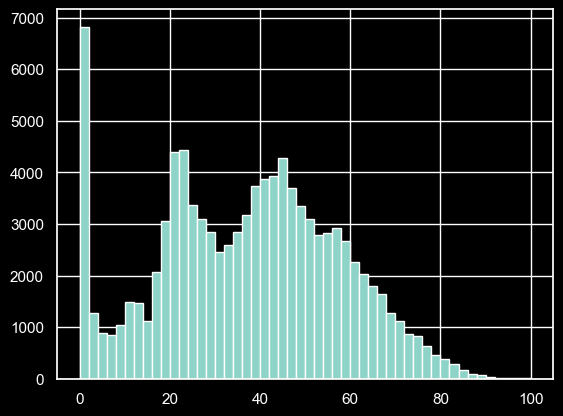

In [40]:
# cehcking the distribution
df['popularity'].hist(bins=50)

what we can grasp from this graph is that there are still a lot of songs with popularity score equal to zero but maybe they are songs of artists that are not known or that by chance have never been listened by those who cretaed the dataset.

We have already seen that there are multiple observations with the same 'track_id', as this feature represents a unique song that may belong to different albums or be recognized with different music genres. For the prediction of the 'popularity', I want to keep only the most popular version of each song. However, I will do this only with the dataset used for the prediction, as for clustering, it is not important for me to have unique 'track_id' values, and I want to retain all the information regarding the different music genres.

## Clustering

### Split train and test

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

Due to the fact that we will have to add to the training and test set the column of the clusters to check if this is a valid method to solve our task; we will create two dummy train and test sets so thta they will not be subject to all the preprocessing and we will able to better use them later. N.B. the nt in the variables means 'No Transformations'

In [42]:
X_train_nt=X_train.copy()
X_test_nt=X_test.copy()

There are by the way some columns that can be dropped by both the training and the test set.

In [43]:
# We  remove the "track_genre", "track_name" and "track_id" column, because these informations are not relevant to my analysis
X_train.drop(["track_genre","track_name", "track_id"], axis=1, inplace=True)
X_test.drop(["track_genre","track_name", "track_id"], axis=1, inplace=True)

In [44]:
X_train

,artists,album_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
51948,Don Omar,Feliz Cumpleaños con Perreo,0,194013,False,0.787,0.872,9,-2.117,1,0.1430,0.00670,0.000193,0.1360,0.6960,92.025,4
18247,Kathleen Madigan,Madigan Again,25,449426,True,0.582,0.896,6,-3.703,1,0.8800,0.85400,0.000000,0.9350,0.4670,88.301,3
112541,Grogi;Ceg;Tankurt Manas,Bu Gece Bizim,40,249357,False,0.820,0.599,2,-10.344,1,0.2430,0.32700,0.000000,0.0743,0.4180,83.993,4
106644,Mimikry,Automatiskt,37,179866,False,0.588,0.930,4,-4.958,1,0.0570,0.19900,0.000000,0.0992,0.8340,135.083,4
54869,Plaid,The Digging Remedy,33,245080,False,0.629,0.418,7,-14.520,1,0.0360,0.17900,0.828000,0.0878,0.1220,139.991,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7185,Trampled by Turtles,On the Highway,28,179573,False,0.531,0.552,2,-7.846,1,0.0324,0.67600,0.000008,0.1090,0.8160,80.945,4
61701,Mariya Takeuchi,REQUEST (30th Anniversary Edition),20,248040,False,0.518,0.517,5,-6.681,1,0.0275,0.18000,0.000029,0.1360,0.1920,136.245,4
86646,Stand Here Alone,Melodichildish,38,215015,False,0.499,0.958,7,-2.317,1,0.0368,0.00246,0.000000,0.2860,0.7290,147.429,4
927,Andrew Foy;Renee Foy;Stephan Baulig,Afterglow (Stephan Baulig Remix),37,213620,False,0.674,0.520,0,-10.106,1,0.0511,0.27200,0.000002,0.1510,0.4220,116.029,4


In [45]:
print(pd.DataFrame(X_train).info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80383 entries, 51948 to 17500
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           80383 non-null  object 
 1   album_name        80383 non-null  object 
 2   popularity        80383 non-null  int64  
 3   duration_ms       80383 non-null  int64  
 4   explicit          80383 non-null  bool   
 5   danceability      80383 non-null  float64
 6   energy            80383 non-null  float64
 7   key               80383 non-null  int64  
 8   loudness          80383 non-null  float64
 9   mode              80383 non-null  int64  
 10  speechiness       80383 non-null  float64
 11  acousticness      80383 non-null  float64
 12  instrumentalness  80383 non-null  float64
 13  liveness          80383 non-null  float64
 14  valence           80383 non-null  float64
 15  tempo             80383 non-null  float64
 16  time_signature    80383 non-null  in

### Encoding and Scaling

In [46]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80383 entries, 51948 to 17500
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           80383 non-null  object 
 1   album_name        80383 non-null  object 
 2   popularity        80383 non-null  int64  
 3   duration_ms       80383 non-null  int64  
 4   explicit          80383 non-null  bool   
 5   danceability      80383 non-null  float64
 6   energy            80383 non-null  float64
 7   key               80383 non-null  int64  
 8   loudness          80383 non-null  float64
 9   mode              80383 non-null  int64  
 10  speechiness       80383 non-null  float64
 11  acousticness      80383 non-null  float64
 12  instrumentalness  80383 non-null  float64
 13  liveness          80383 non-null  float64
 14  valence           80383 non-null  float64
 15  tempo             80383 non-null  float64
 16  time_signature    80383 non-null  in

Let's encode the categorical variables "album_name" and "artists" using vaex

In [47]:
# Convert the train and test columns "album_name" and "artists" to Vaex 
X_train_vaex = vaex.from_pandas(X_train[["album_name", "artists"]])
X_test_vaex = vaex.from_pandas(X_test[["album_name", "artists"]])

# Encod the two columns through the MultiHotEncoder 
multi_hot_encoder = vaex.ml.MultiHotEncoder(features=["artists", "album_name"], fill_value=0)

# fid and transform on the train but only transform on the test
X_train_vaex = multi_hot_encoder.fit_transform(X_train_vaex)
X_test_vaex = multi_hot_encoder.transform(X_test_vaex)

In [48]:
# Drop the "album_name" and "artists" original categorical variables from both sets
X_train = X_train.drop(["album_name", "artists"], axis=1)
X_test = X_test.drop(["album_name", "artists"], axis=1)

X_train.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
51948,0,194013,False,0.787,0.872,9,-2.117,1,0.143,0.0067,0.000193,0.1360,0.696,92.025,4
18247,25,449426,True,0.582,0.896,6,-3.703,1,0.880,0.8540,0.000000,0.9350,0.467,88.301,3
112541,40,249357,False,0.820,0.599,2,-10.344,1,0.243,0.3270,0.000000,0.0743,0.418,83.993,4
106644,37,179866,False,0.588,0.930,4,-4.958,1,0.057,0.1990,0.000000,0.0992,0.834,135.083,4
54869,33,245080,False,0.629,0.418,7,-14.520,1,0.036,0.1790,0.828000,0.0878,0.122,139.991,4


In [49]:
# Reconvert the 2 columns from vaex to pandas
encoded_train = pd.DataFrame(X_train_vaex)
encoded_test = pd.DataFrame(X_test_vaex)

# Reset the index of the encoded train and test sets
encoded_train.reset_index(drop=True, inplace=True)
encoded_test.reset_index(drop=True, inplace=True)

# Concatenate only the train encoded set to the original one
X_train = pd.concat([encoded_train, X_train.reset_index(drop=True)], axis=1)
X_test = pd.concat([encoded_test, X_test.reset_index(drop=True)], axis=1)

I can see that I have to encode the first three columns that are categorical, I'm going to use One Hot Encoder because I don't want to give them a ranking, and encode the boolean variable "explicit".

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from category_encoders import BinaryEncoder

# Convert all columns names to string, because ColumnTransformer expect all names as string type
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Define column transformer
# I set in the encoder handle_unknown="ignore" to ensure In summary, 
# to preserve the observation of the author column
ct = ColumnTransformer(
    [('binary', BinaryEncoder(), ["explicit"]), 
     ('scale', MinMaxScaler(), ["popularity", "duration_ms", "danceability", "key", "loudness",
                                  "speechiness", "acousticness", "valence", "tempo", "time_signature"])],
                                   remainder="passthrough")

X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [51]:
# Let's see if the preprocess has been performed correctly
print(pd.DataFrame(X_train).head())
print(pd.DataFrame(X_test).head())

    0     1         2         3         4         5         6         7   \
0  0.0  0.00  0.034577  0.799797  0.818182  0.877014  0.148187  0.006727   
1  1.0  0.25  0.083470  0.591463  0.545455  0.847678  0.911917  0.857430   
2  0.0  0.40  0.045171  0.833333  0.181818  0.724840  0.251813  0.328313   
3  0.0  0.37  0.031869  0.597561  0.363636  0.824464  0.059067  0.199799   
4  0.0  0.33  0.044353  0.639228  0.636364  0.647596  0.037306  0.179719   

         8         9   ...   36   37   38   39   40   41     42   43  \
0  0.700201  0.378125  ...  1.0  1.0  1.0  0.0  0.0  1.0  0.872  1.0   
1  0.469819  0.362823  ...  1.0  0.0  1.0  0.0  0.0  1.0  0.896  1.0   
2  0.420523  0.345122  ...  1.0  1.0  1.0  1.0  0.0  1.0  0.599  1.0   
3  0.839034  0.555047  ...  1.0  0.0  0.0  0.0  0.0  0.0  0.930  1.0   
4  0.122736  0.575214  ...  1.0  0.0  0.0  1.0  1.0  0.0  0.418  1.0   

         44      45  
0  0.000193  0.1360  
1  0.000000  0.9350  
2  0.000000  0.0743  
3  0.000000  0.0992  


### Build the model

In [52]:
from sklearn.cluster import KMeans

# Create a k-means clustering model with the k-means++ initialization method
kmeans = KMeans(n_clusters=df["track_genre"].nunique(), init='k-means++', random_state=0)

# Fit the model to our data
kmeans.fit(X_train)

# Get the cluster labels for the training and test data
train_labels = kmeans.predict(X_train)
test_labels = kmeans.predict(X_test)

/Users/leo/opt/anaconda3/envs/datavis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [53]:
print(train_labels)
print(test_labels)

[  9  99 105 ... 109  52  27]
[104 112 104 ...  28  29  31]


In [54]:
# Add the labels from clustering arrays as new columns to the train and test labelled sets
X_train_nt['label_clustering'] = train_labels
X_train_nt

X_test_nt['label_clustering'] = test_labels
X_test_nt

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,label_clustering
59399,6bWSlgj7GqYXsorKurrxTJ,Alireza Mashayekhi;Marie-Thérèse Grisenti;Marc...,A. Mashayekhi - 5 Sonates Pour Violoncelle Et ...,Sonate II Opus 116 Pour Violoncelle Et Piano -...,0,312533,False,0.300,0.0869,4,...,0,0.0401,0.970000,0.832000,0.0975,0.0353,83.755,3,iranian,104
12107,2PPxw6YXIVWcIe79qedaIX,Mavis Hee,靜聽精彩十三首,傾城,50,255266,False,0.647,0.2620,7,...,1,0.0456,0.706000,0.000000,0.1290,0.1510,126.117,4,cantopop,112
110823,2c7y5n1q4rwHNTUPzi4HOe,Infected Mushroom;Bliss,IM25,Boss La Rosh,51,401167,False,0.530,0.8400,7,...,1,0.0400,0.007690,0.906000,0.0894,0.0398,139.967,4,trance,104
38050,2KvbRojbZGMsWr1Nuj5n2f,Jakob;Clairo,Bedroom Tapes,You Might Be Sleeping,67,147093,False,0.587,0.5650,7,...,1,0.0265,0.731000,0.341000,0.1690,0.5080,92.604,4,garage,104
41677,4vPrLzCvgdwk5c3Z8BtRN3,Inkubus Sukkubus,Belladonna & Aconite 2011 Digital Remaster,Samhain,23,262440,False,0.530,0.6890,11,...,0,0.0367,0.000403,0.019800,0.2320,0.3980,130.880,4,goth,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68185,3iJDmx2BxUCXgjatgYfhoe,Anuel AA;KAROL G,El perreo es el futuro,Secreto,0,258799,False,0.807,0.8030,11,...,1,0.1260,0.600000,0.008500,0.1360,0.7060,91.982,4,latino,64
34657,4R203W90Sw4UBhtVMOtBKw,Fossils,Fossils,Nemesis,34,358714,False,0.620,0.6400,5,...,0,0.0399,0.054500,0.000048,0.1000,0.4050,113.008,4,folk,111
73268,1uKYwIpXYEB1xw4JnAPP8w,Layton Giordani,New Generation,Feel a Vibe,48,274809,False,0.707,0.9270,1,...,1,0.1090,0.121000,0.550000,0.0860,0.0519,131.009,4,minimal-techno,28
83416,4skbQNtyjy8A7mo8oqe2oD,Chris Lake;NPC,A Drug From God,A Drug From God,62,192455,False,0.714,0.8830,9,...,1,0.0625,0.008190,0.843000,0.2310,0.8190,126.016,4,progressive-house,29


In [55]:
# Let's do some visual comparison between the lclustering_labels and track_genre
X_train_nt.sort_values(by='track_genre', ascending=True).head(30)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,label_clustering
393,71vcffc4Yfz0pt9AbaL386,A Great Big World,Is There Anybody Out There? - Track by Track C...,I Don't Wanna Love Somebody Else,49,163960,False,0.495,0.2200,5,...,1,0.0355,0.84700,0.000001,0.0957,0.3450,126.618,4,acoustic,111
774,3kYLpeRglpJLQkCsbp7p4j,Melvin Taylor;Lucky Peterson;Titus Williams;Ra...,"Plays the Blues for You (feat. Lucky Peterson,...",I 'll Play the Blues for You,52,317133,False,0.654,0.3160,0,...,0,0.0410,0.78600,0.056300,0.1310,0.6970,94.485,4,acoustic,12
283,38ssTLOvoZyL4CLa4ImDG9,Kina Grannis;Imaginary Future,What a Wonderful World,What a Wonderful World,51,137066,False,0.486,0.0399,0,...,1,0.0405,0.95300,0.000009,0.1150,0.1550,95.066,3,acoustic,44
549,2saK0E712wIB3Gf8QLuFYX,Get Dead,Dancing with the Curse,Nickel Plated,29,136815,True,0.461,0.8930,9,...,1,0.1210,0.00323,0.000000,0.6540,0.4000,179.920,4,acoustic,1
413,6f9qzNP6elRi8i2NgqGoE5,John Adams,Bohemian Rhapsody (Acoustic),Bohemian Rhapsody - Acoustic,52,173426,False,0.451,0.0665,0,...,0,0.0516,0.96700,0.000001,0.1090,0.3490,64.289,4,acoustic,85
459,4eSOx2FzrVXpKmtssY59LB,Brandon Chase,I'll Say I Do,I'll Say I Do,39,235000,False,0.391,0.3100,7,...,1,0.0268,0.61400,0.000004,0.1000,0.2950,83.460,4,acoustic,5
656,3zjr7jirhGwvqGuuJuIxjg,Andrew Foy;Renee Foy,Photograph,Photograph,30,218590,False,0.807,0.0459,4,...,1,0.0481,0.85200,0.000006,0.1020,0.2750,110.512,4,acoustic,66
128,38YgZVHPWOWsKrsCXz6JyP,Matt Nathanson,Some Mad Hope,Come On Get Higher,71,215173,False,0.672,0.6230,9,...,1,0.0297,0.24100,0.000000,0.0848,0.6170,92.018,4,acoustic,31
877,7pv5juhfq1kco6wioikGHt,Eddie Vedder,Earthling,Invincible,51,286950,False,0.578,0.7420,7,...,1,0.0260,0.00511,0.000004,0.1170,0.2000,107.028,4,acoustic,81
68,7LwGBxB0h0CVmkOZxYKn0g,Andrew Belle,In My Veins (Feat. Erin Mccarley),In My Veins - Feat. Erin Mccarley,65,318908,False,0.548,0.4200,0,...,1,0.0277,0.19800,0.000004,0.0899,0.1960,128.012,4,acoustic,102


In order to assign a cluster to each track genre, we decided to count the cluster number that appears mostly for each genre

In [56]:
# Create a cycle that assign a cluster to each genre based on the cluster number that appears mostly and
# store the results in a dictionary called "assign"
assign_train = {}
l = list(X_train_nt["track_genre"].unique())
for i in l:
  voting = X_train_nt[X_train_nt["track_genre"] == i]["label_clustering"].value_counts()
  cluster = voting.iloc[0]
  assign_train[i] = cluster
assign_train

{'hip-hop': 23,
 'comedy': 31,
 'turkish': 22,
 'swedish': 26,
 'idm': 29,
 'death-metal': 25,
 'garage': 55,
 'hard-rock': 78,
 'brazil': 34,
 'children': 80,
 'minimal-techno': 23,
 'pop-film': 32,
 'folk': 40,
 'show-tunes': 41,
 'punk': 23,
 'gospel': 27,
 'songwriter': 45,
 'anime': 39,
 'house': 15,
 'french': 25,
 'afrobeat': 46,
 'goth': 74,
 'pop': 28,
 'dubstep': 30,
 'dub': 33,
 'ambient': 103,
 'club': 128,
 'forro': 54,
 'deep-house': 23,
 'disco': 27,
 'chicago-house': 36,
 'industrial': 47,
 'techno': 28,
 'breakbeat': 45,
 'metal': 54,
 'british': 113,
 'grunge': 116,
 'rockabilly': 84,
 'salsa': 34,
 'grindcore': 64,
 'alt-rock': 25,
 'dance': 23,
 'k-pop': 117,
 'tango': 64,
 'new-age': 96,
 'hardcore': 35,
 'trip-hop': 32,
 'j-idol': 82,
 'kids': 57,
 'samba': 29,
 'latino': 62,
 'drum-and-bass': 22,
 'hardstyle': 17,
 'piano': 71,
 'sad': 90,
 'reggae': 62,
 'black-metal': 23,
 'happy': 56,
 'synth-pop': 33,
 'groove': 32,
 'disney': 111,
 'trance': 37,
 'funk': 27,

In [57]:
# Same for the test set 
assign_test = {}
l = list(X_test_nt["track_genre"].unique())
for i in l:
  voting = X_test_nt[X_test_nt["track_genre"] == i]["label_clustering"].value_counts()
  cluster = voting.iloc[0]
  assign_test[i] = cluster
assign_test

{'iranian': 24,
 'cantopop': 29,
 'trance': 54,
 'garage': 29,
 'goth': 21,
 'grindcore': 16,
 'british': 31,
 'j-idol': 19,
 'grunge': 27,
 'j-rock': 19,
 'psych-rock': 33,
 'sad': 38,
 'disney': 27,
 'metal': 13,
 'comedy': 22,
 'malay': 61,
 'progressive-house': 48,
 'electro': 9,
 'alternative': 6,
 'guitar': 55,
 'blues': 30,
 'mandopop': 36,
 'black-metal': 31,
 'j-pop': 15,
 'opera': 44,
 'romance': 19,
 'r-n-b': 11,
 'techno': 32,
 'death-metal': 20,
 'k-pop': 50,
 'rock-n-roll': 19,
 'folk': 28,
 'j-dance': 45,
 'reggae': 21,
 'detroit-techno': 25,
 'ska': 24,
 'electronic': 47,
 'forro': 27,
 'latino': 14,
 'sleep': 49,
 'rock': 7,
 'study': 32,
 'edm': 16,
 'disco': 45,
 'groove': 36,
 'happy': 41,
 'german': 35,
 'industrial': 17,
 'chicago-house': 40,
 'latin': 18,
 'pagode': 16,
 'rockabilly': 21,
 'power-pop': 14,
 'tango': 31,
 'acoustic': 39,
 'funk': 67,
 'brazil': 42,
 'mpb': 27,
 'dub': 17,
 'deep-house': 53,
 'dubstep': 33,
 'hip-hop': 31,
 'spanish': 55,
 'ambient

In [58]:
# TRAINING SET
# Adding a column in the dataframe according to what is said by the dictionary
c=[]
for elem in X_train_nt['track_genre']:
    genere=elem
    c.append(assign_train[genere])

# Assigning the clusters found with the dictionary to the dataframe
X_train_nt['dictionary_cluster']=c


# Calcualting the accuracy
# Calculate the number of matching values
matches = (X_train_nt['label_clustering'] == X_train_nt['dictionary_cluster']).sum()

# Calculate the total number of values
total = len(X_train_nt)

# Calculate the accuracy
accuracy = (matches / total * 100).round(3)
print(f"Accuracy on training set: {accuracy} %")

Accuracy on training set: 0.799 %


In [59]:
X_test_nt

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,label_clustering
59399,6bWSlgj7GqYXsorKurrxTJ,Alireza Mashayekhi;Marie-Thérèse Grisenti;Marc...,A. Mashayekhi - 5 Sonates Pour Violoncelle Et ...,Sonate II Opus 116 Pour Violoncelle Et Piano -...,0,312533,False,0.300,0.0869,4,...,0,0.0401,0.970000,0.832000,0.0975,0.0353,83.755,3,iranian,104
12107,2PPxw6YXIVWcIe79qedaIX,Mavis Hee,靜聽精彩十三首,傾城,50,255266,False,0.647,0.2620,7,...,1,0.0456,0.706000,0.000000,0.1290,0.1510,126.117,4,cantopop,112
110823,2c7y5n1q4rwHNTUPzi4HOe,Infected Mushroom;Bliss,IM25,Boss La Rosh,51,401167,False,0.530,0.8400,7,...,1,0.0400,0.007690,0.906000,0.0894,0.0398,139.967,4,trance,104
38050,2KvbRojbZGMsWr1Nuj5n2f,Jakob;Clairo,Bedroom Tapes,You Might Be Sleeping,67,147093,False,0.587,0.5650,7,...,1,0.0265,0.731000,0.341000,0.1690,0.5080,92.604,4,garage,104
41677,4vPrLzCvgdwk5c3Z8BtRN3,Inkubus Sukkubus,Belladonna & Aconite 2011 Digital Remaster,Samhain,23,262440,False,0.530,0.6890,11,...,0,0.0367,0.000403,0.019800,0.2320,0.3980,130.880,4,goth,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68185,3iJDmx2BxUCXgjatgYfhoe,Anuel AA;KAROL G,El perreo es el futuro,Secreto,0,258799,False,0.807,0.8030,11,...,1,0.1260,0.600000,0.008500,0.1360,0.7060,91.982,4,latino,64
34657,4R203W90Sw4UBhtVMOtBKw,Fossils,Fossils,Nemesis,34,358714,False,0.620,0.6400,5,...,0,0.0399,0.054500,0.000048,0.1000,0.4050,113.008,4,folk,111
73268,1uKYwIpXYEB1xw4JnAPP8w,Layton Giordani,New Generation,Feel a Vibe,48,274809,False,0.707,0.9270,1,...,1,0.1090,0.121000,0.550000,0.0860,0.0519,131.009,4,minimal-techno,28
83416,4skbQNtyjy8A7mo8oqe2oD,Chris Lake;NPC,A Drug From God,A Drug From God,62,192455,False,0.714,0.8830,9,...,1,0.0625,0.008190,0.843000,0.2310,0.8190,126.016,4,progressive-house,29


In [60]:
# TEST SET
# Adding a column in the dataframe according to what is said by the dictionary
b=[]
for elem in X_test_nt['track_genre']:
    genere=elem
    b.append(assign_test[genere])

# Assigning the clusters found with the dictionary to the dataframe
X_test_nt['dictionary_cluster']=b


# Calcualting the accuracy
# Calculate the number of matching values
matches = (X_test_nt['label_clustering'] == X_test_nt['dictionary_cluster']).sum()

# Calculate the total number of values
total = len(X_test_nt)

# Calculate the accuracy
accuracy = (matches / total * 100).round(3)
print(f"Accuracy on test set: {accuracy} %")

Accuracy on test set: 0.642 %


we should ask ourselves why is this method performing so bad in trying to classify the track genre?
clustering methods rely on similarities and on them separate the most dissimilar clusters and keep together the mst si milar obaservtion. the problem in this case is that songs belonging to different genres have not that precse boundaries ost of the times and different music genres also overlap accroding to some feature of our dataset.
Can be state objectively that Led Zeppelin belong to the rock genre... no, cannot be said objectively. This is the reason why clustring ,ethods perform bad in this case.

# Dealing with Zeros


In [61]:
# creating a dataframe with only songs with zeros
df0=df[df['popularity']==0]
df0

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
199,27Fq4XyOkogdGLcfsVdjFb,Keb' Mo';Gerald Albright,Un tecito y a mimir,"Moonlight, Mistletoe & You",0,209293,False,0.649,0.399,6,-7.894,1,0.0256,0.184,0.000108,0.1130,0.3420,97.498,3,acoustic
347,3nImoHhXBOqYcdTN8gt9eE,Matt Costa,sadsadchristmas,I Bet On Flying High,0,155000,False,0.543,0.359,8,-6.571,1,0.0302,0.651,0.000000,0.0981,0.3460,109.735,4,acoustic
348,0B3g35bVxJ42Y0W0I5WBIU,Matt Costa,Christmas Vibes But Not Christmas Songs,I Bet On Flying High,0,155000,False,0.543,0.359,8,-6.571,1,0.0302,0.651,0.000000,0.0981,0.3460,109.735,4,acoustic
349,1igSa6QILI1jyE970ZMYW1,Matt Costa,Acoustic Christmas Campfire,I Bet On Flying High,0,155000,False,0.543,0.359,8,-6.571,1,0.0302,0.651,0.000000,0.0981,0.3460,109.735,4,acoustic
697,2Xzh9zjiKhM9YT4AcJxLkQ,Mindy Smith,Country Holiday,I'll Be Home for Christmas,0,216093,False,0.570,0.427,6,-5.873,1,0.0296,0.368,0.000017,0.1560,0.1860,98.995,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113033,0zpNYm246lwLt7HO6Lwcb1,Michael W. Smith;Carrie Underwood,Santa's Christmas List,All Is Well,0,235493,False,0.238,0.329,5,-7.081,1,0.0354,0.935,0.000000,0.1180,0.1930,136.470,3,world-music
113039,5Z5nDrUm4et2SBtLDKnF38,Michael W. Smith;Lady Antebellum,Santa's Christmas List,White Christmas,0,229106,False,0.335,0.552,8,-6.654,1,0.0357,0.465,0.000001,0.1020,0.3500,126.622,4,world-music
113042,2eXCP4kLEm5b11TH2MVas6,Chris Tomlin;Audrey Assad,Santa's Christmas List,Winter Snow,0,212773,False,0.444,0.330,2,-15.594,1,0.2620,0.954,0.000001,0.6760,0.3080,95.470,4,world-music
113043,2XdGsYBDQYXjgdixMdn7w2,Matt Redman;Chris Tomlin,Slow Christmas Songs 2022,Angels (Singing Gloria),0,316920,False,0.424,0.239,3,-10.601,1,0.0309,0.658,0.000017,0.0951,0.0697,141.880,4,world-music


In [62]:
# which artists have the highest number of songs with 0 as popularity score?
artist_counts_0 = df0['artists'].value_counts().reset_index()
artist_names_list_0 = artist_counts_0['index'].tolist()
artist_names_list_0

['Don Omar',
 'Tom Petty and the Heartbreakers',
 'Feid',
 'J Balvin',
 'Najand',
 'Eric Burdon',
 'KAROL G',
 'Sarah Connor',
 'Mahalia',
 'Marvin Gaye',
 'Sturgill Simpson',
 'The Killers;Ryan Pardey',
 'Bruno Mars;Anderson .Paak;Silk Sonic',
 'Leila Bela',
 'Sam Smith',
 'Kiawasch Sahebnassagh',
 'Giuseppe Verdi;Vincenzo Ciliberti',
 'Tito "El Bambino";Randy',
 'Wiz Khalifa',
 'Smokey Robinson & The Miracles',
 'The Knocks;Rivers Cuomo;Royal & the Serpent',
 'Daddy Yankee;Bad Bunny',
 'Andrew Bird',
 'Nikolai Erdenko;Ансамбль "Джанг"',
 'J Balvin;Bad Bunny',
 'Years & Years',
 'Michael Ray',
 'Gregory Porter',
 'J Balvin;Maria Becerra',
 'Lalo Ebratt;Trapical',
 'Chino & Nacho',
 'Charli XCX;Rina Sawayama',
 'The Pogues;Kirsty MacColl',
 'Chris Jedi;Anuel AA;Chencho Corleone;Ñengo Flow',
 'Juan Magán;Belinda;Lapiz Conciente',
 'Сергей Зыков',
 'Marshmello;Bastille',
 'Nat King Cole Trio',
 'The Ready Set',
 'Tony Bennett;Lady Gaga',
 'Nat King Cole;John Legend',
 'Traditional;Cappel

In [63]:
# which artists have the highest number of songs with popularity score >0?
df_artists_bigger_0=df[df['popularity']>0]
artist_counts = df_artists_bigger_0['artists'].value_counts().reset_index()
artist_names_list = artist_counts['index'].tolist()
artist_names_list

['The Beatles',
 'George Jones',
 'Linkin Park',
 'Prateek Kuhad',
 'Håkan Hellström',
 'my little airport',
 'Charlie Brown Jr.',
 'Elvis Presley',
 'Scooter',
 'BTS',
 'Feid',
 'Glee Cast',
 'Hank Williams',
 'Arctic Monkeys',
 'Red Hot Chili Peppers',
 'Vybz Kartel',
 'CoComelon',
 'Anupam Roy',
 'Seiko Matsuda',
 'OneRepublic',
 'Germaine Franco',
 'Hank Williams;Drifting Cowboys',
 'Eikichi Yazawa',
 'Eason Chan',
 'Daddy Yankee',
 'Almafuerte',
 'Lamb of God',
 'Maneva',
 'Jay Chou',
 'Little Symphony',
 'Rammstein',
 'Carlos Gardel',
 'Pink Floyd',
 'Sujatha',
 "Dan Gibson's Solitudes",
 'Napalm Death',
 'Nogizaka46',
 'BOØWY',
 'Sarah, the Illstrumentalist',
 'Nirvana',
 'Shiritsu Ebisu Chugaku',
 'Yiruma',
 'Ritviz',
 'Boris Brejcha',
 'PXNDX',
 'Robert Hood',
 'Hillsong Worship',
 'Alphaxone',
 'Exaltasamba',
 'Carajo',
 'Legião Urbana',
 'The Chemical Brothers',
 'The Prodigy',
 'Cigarettes After Sex',
 'Chris Tomlin',
 'XXXTENTACION',
 'Adele',
 'Wolfgang Amadeus Mozart;Dan

In [64]:
# let's create a list of artists thta have more songs with 0 popularity scorrs rateher than songs with pop score higher than zero
filtered_artist_names = []

for artist in artist_names_list_0:
    count_0 = artist_counts_0.loc[artist_counts_0['index'] == artist, 'artists'].values
    count = artist_counts.loc[artist_counts['index'] == artist, 'artists'].values
    
    print(f"Artist: {artist}, count_0: {count_0}, count: {count}")
    
    if count_0 > count:
        filtered_artist_names.append(artist)

Artist: Don Omar, count_0: [67], count: [69]
Artist: Tom Petty and the Heartbreakers, count_0: [59], count: []
Artist: Feid, count_0: [53], count: [148]
Artist: J Balvin, count_0: [44], count: [59]
Artist: Najand, count_0: [33], count: []
Artist: Eric Burdon, count_0: [33], count: []
Artist: KAROL G, count_0: [31], count: [38]
Artist: Sarah Connor, count_0: [28], count: []
Artist: Mahalia, count_0: [27], count: []
Artist: Marvin Gaye, count_0: [26], count: []
Artist: Sturgill Simpson, count_0: [24], count: []
Artist: The Killers;Ryan Pardey, count_0: [24], count: []
Artist: Bruno Mars;Anderson .Paak;Silk Sonic, count_0: [24], count: [31]
Artist: Leila Bela, count_0: [23], count: []
Artist: Sam Smith, count_0: [22], count: [23]
Artist: Kiawasch Sahebnassagh, count_0: [22], count: []
Artist: Giuseppe Verdi;Vincenzo Ciliberti, count_0: [22], count: []
Artist: Tito "El Bambino";Randy, count_0: [20], count: []
Artist: Wiz Khalifa, count_0: [20], count: []
Artist: Smokey Robinson & The Mirac

/var/folders/fn/cfz1v8ln76s58pxjvj3vk_hh0000gn/T/ipykernel_7224/4118573251.py:10: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if count_0 > count:


Artist: Black Eyed Peas, count_0: [5], count: [5]
Artist: Arash Pandi, count_0: [5], count: []
Artist: Ike & Tina Turner, count_0: [5], count: []
Artist: Ravyn Lenae, count_0: [5], count: []
Artist: Bebe Rexha;Pink Sweat$;Lunay, count_0: [5], count: []
Artist: Mariah Angeliq;Casper Magico, count_0: [5], count: []
Artist: Relaxing Music Therapy, count_0: [5], count: []
Artist: Big Daddy Kane, count_0: [5], count: []
Artist: Roy Woods, count_0: [5], count: []
Artist: Paulina Rubio, count_0: [5], count: []
Artist: chloe moriondo, count_0: [5], count: []
Artist: Baby Tate, count_0: [5], count: []
Artist: Booker T. & the M.G.'s, count_0: [5], count: []
Artist: Connate Exasperation, count_0: [5], count: []
Artist: MC Lyte, count_0: [5], count: []
Artist: Lenny Kravitz, count_0: [5], count: [5]
Artist: Joy Oladokun, count_0: [5], count: []
Artist: Zhoobin Askarieh;Ali Sasha, count_0: [5], count: []
Artist: Martha Reeves & The Vandellas, count_0: [5], count: [5]
Artist: Juan Magán;Mala Rodrígu

In [65]:
# who are these artists?
filtered_artist_names

[]

In [66]:
# let's discard them
df.drop(df[df['artists'].isin(filtered_artist_names)].index, inplace=True)
df_artists_bigger_0

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [67]:
# Create an empty DataFrame to store the results
result_df = pd.DataFrame(columns=['Artist', 'Average Score'])

for artist in artist_names_list_0:
    # Filter the dataset for each artist
    filtered_df = df_artists_bigger_0[df_artists_bigger_0['artists'] == artist]
    
    # Compute the average score for the artist
    average_score = filtered_df['popularity'].mean()
    
    # Add the artist name and average score to the result DataFrame
    result_df = result_df.append({'Artist': artist, 'Average Score': average_score}, ignore_index=True)

# Print the result DataFrame
print(result_df)

/var/folders/fn/cfz1v8ln76s58pxjvj3vk_hh0000gn/T/ipykernel_7224/3112533607.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Artist': artist, 'Average Score': average_score}, ignore_index=True)
/var/folders/fn/cfz1v8ln76s58pxjvj3vk_hh0000gn/T/ipykernel_7224/3112533607.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Artist': artist, 'Average Score': average_score}, ignore_index=True)
/var/folders/fn/cfz1v8ln76s58pxjvj3vk_hh0000gn/T/ipykernel_7224/3112533607.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Artist': artist, 'Average Score': average_score}, ignore_index=True)
/var/folders/fn/cfz1v8ln76s58pxjvj3vk_hh0000gn/T/

                                 Artist  Average Score
0                              Don Omar       6.362319
1       Tom Petty and the Heartbreakers            NaN
2                                  Feid      13.736486
3                              J Balvin      12.966102
4                                Najand            NaN
...                                 ...            ...
1803                      The Exploited            NaN
1804                         The Almost            NaN
1805          Ran-D;Sound Rush;LePrince            NaN
1806              Zatox;Zyon;Dave Revan            NaN
1807  Michael W. Smith;Carrie Underwood            NaN

[1808 rows x 2 columns]


/var/folders/fn/cfz1v8ln76s58pxjvj3vk_hh0000gn/T/ipykernel_7224/3112533607.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Artist': artist, 'Average Score': average_score}, ignore_index=True)
/var/folders/fn/cfz1v8ln76s58pxjvj3vk_hh0000gn/T/ipykernel_7224/3112533607.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Artist': artist, 'Average Score': average_score}, ignore_index=True)
/var/folders/fn/cfz1v8ln76s58pxjvj3vk_hh0000gn/T/ipykernel_7224/3112533607.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Artist': artist, 'Average Score': average_score}, ignore_index=True)
/var/folders/fn/cfz1v8ln76s58pxjvj3vk_hh0000gn/T/

In [68]:
# considering only artists such thta their average score is bigger than a precise score
result_df_to_eliminate=result_df[result_df['Average Score']>=20]
# storing in a list the names of the artists whose rows with 0 as popularity score must be discarded
list_to_eliminate=result_df_to_eliminate['Artist'].to_list()
# dropping the rows with popularity equal to 0 and name of the artists equal to the artists names in list to elimate
df.drop(df[(df['artists'].isin(list_to_eliminate)) & (df['popularity'] == 0)].index, inplace=True)

In [69]:
# checking the exact amount of zeros thta we have in the dataset
df['popularity'].value_counts()

0      5422
22     2331
21     2316
44     2281
23     2099
       ... 
98        7
94        7
95        5
100       2
99        1
Name: popularity, Length: 101, dtype: int64

<AxesSubplot: >

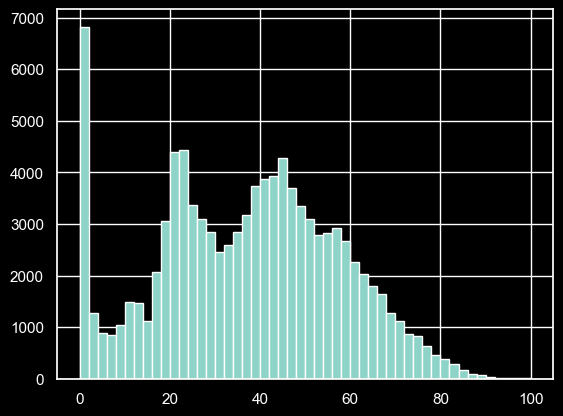

In [70]:
# cehcking the distribution
df['popularity'].hist(bins=50)

what we can grasp from this graph is that there are still a lot of songs with popularity score equal to zero but maybe they are songs of artists that are not known or that by chance have never been listened by those who cretaed the dataset.

## Prediction

### Import the dataset for the prediction task

In [71]:
df_prediction = df
df_prediction.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


We have already seen that there are multiple observations with the same 'track_id', as this feature represents a unique song that may belong to different albums or be recognized with different music genres. For the prediction of the 'popularity', I want to keep only the most popular version of each song.

In [72]:
# I order the observation first on the "track_id" and then on the "popularity"
df_prediction.sort_values(by=['track_id', 'popularity'], inplace=True)

# I drop all the duplicates based on the "track_id" variable, and keep only the first observation,
# that is the one with the highest "popularity" score 
df_prediction.drop_duplicates(subset="track_id", keep='first', inplace=True)

In [73]:
# I check if in the dataset the "track_id" variable has only unique observation
print(df_prediction.shape[0])
print(df_prediction.nunique())

82177
track_id            82177
artists             30815
album_name          45535
track_name          70603
popularity            101
duration_ms         49299
explicit                2
danceability         1156
energy               2065
key                    12
loudness            19181
mode                    2
speechiness          1487
acousticness         5043
instrumentalness     5333
liveness             1719
valence              1780
tempo               43987
time_signature          5
track_genre           113
dtype: int64


In [74]:
# Remove the "track_id" and "track_name" columns from the dataset
df_prediction = df_prediction.drop(columns=['track_id', 'track_name'])

### Split train and test

In [75]:
# Define the dependent variable (y) and the independent variables (X)
y = df_prediction['popularity']
X = df_prediction.drop('popularity', axis=1)

In [76]:
from sklearn.model_selection import train_test_split
X_train_prediction, X_test_prediction, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [77]:
X_train_prediction

,artists,album_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
42574,Napalm Death,Death By Manipulation,125226,False,0.341,0.9030,1,-14.599,1,0.0741,0.000163,0.890000,0.6060,0.2850,93.662,4,grindcore
38327,Ethanol Blend,The Blend Part 2.,198485,False,0.444,0.6440,3,-9.469,1,0.0332,0.004050,0.047700,0.1030,0.8060,157.423,4,garage
113413,Darlene Zschech,Revealing Jesus,364053,False,0.358,0.7410,2,-6.633,1,0.0613,0.000167,0.000001,0.5550,0.0752,121.133,4,world-music
11475,Donovan,The Hurdy Gurdy Man,193466,False,0.405,0.4630,0,-16.167,1,0.0542,0.003790,0.044200,0.3920,0.5420,79.451,4,british
4910,Balmorhea,Rivers Arms,351186,False,0.254,0.2460,2,-14.722,0,0.0384,0.985000,0.882000,0.0983,0.1200,201.608,4,ambient
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45790,Kevin Teves,Slack Key Guitar,290133,False,0.712,0.0754,9,-22.393,1,0.0540,0.937000,0.730000,0.1120,0.3490,113.986,4,guitar
35907,Os Barões Da Pisadinha,"Da Roça Pra Cidade (Ao Vivo), Vol. 05",126199,False,0.659,0.9440,9,-3.055,0,0.0574,0.433000,0.000002,0.1060,0.9170,172.052,4,forro
49340,Ransom;MC Creature,Pussy Lounge 2016,147064,False,0.511,0.9600,8,-3.884,1,0.2900,0.144000,0.334000,0.3590,0.4390,152.587,4,hardstyle
24450,The Other People Place,Lifestyles Of The Laptop Café,466413,False,0.726,0.5200,6,-11.816,1,0.0528,0.005620,0.866000,0.1090,0.3190,130.686,4,detroit-techno


### Encoding and Scaling

In [78]:
df_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82177 entries, 39463 to 82357
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           82177 non-null  object 
 1   album_name        82177 non-null  object 
 2   popularity        82177 non-null  int64  
 3   duration_ms       82177 non-null  int64  
 4   explicit          82177 non-null  bool   
 5   danceability      82177 non-null  float64
 6   energy            82177 non-null  float64
 7   key               82177 non-null  int64  
 8   loudness          82177 non-null  float64
 9   mode              82177 non-null  int64  
 10  speechiness       82177 non-null  float64
 11  acousticness      82177 non-null  float64
 12  instrumentalness  82177 non-null  float64
 13  liveness          82177 non-null  float64
 14  valence           82177 non-null  float64
 15  tempo             82177 non-null  float64
 16  time_signature    82177 non-null  in

Let's encode the categorical variables "album_name", "artists" and "track_genre" using vaex

In [79]:
# Convert the train and test columns "album_name", "artists" and "track_genre" to Vaex 
X_train_prediction_vaex = vaex.from_pandas(X_train_prediction[["album_name", "artists", "track_genre"]])
X_test_prediction_vaex = vaex.from_pandas(X_test_prediction[["album_name", "artists", "track_genre"]])

# Encod the three columns through the MultiHotEncoder 
multi_hot_encoder_prediction = vaex.ml.MultiHotEncoder(features=["artists", "album_name", "track_genre"], fill_value=0)

# fid and transform on the train but only transform on the test
X_train_prediction_vaex = multi_hot_encoder_prediction.fit_transform(X_train_prediction_vaex)
X_test_prediction_vaex = multi_hot_encoder_prediction.transform(X_test_prediction_vaex)

In [80]:
# Drop the "album_name", "artists" and "track_genre" original categorical variables from both sets
X_train_prediction = X_train_prediction.drop(["album_name", "artists", "track_genre"], axis=1)
X_test_prediction = X_test_prediction.drop(["album_name", "artists", "track_genre"], axis=1)

X_train_prediction.head()

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
42574,125226,False,0.341,0.903,1,-14.599,1,0.0741,0.000163,0.890000,0.6060,0.2850,93.662,4
38327,198485,False,0.444,0.644,3,-9.469,1,0.0332,0.004050,0.047700,0.1030,0.8060,157.423,4
113413,364053,False,0.358,0.741,2,-6.633,1,0.0613,0.000167,0.000001,0.5550,0.0752,121.133,4
11475,193466,False,0.405,0.463,0,-16.167,1,0.0542,0.003790,0.044200,0.3920,0.5420,79.451,4
4910,351186,False,0.254,0.246,2,-14.722,0,0.0384,0.985000,0.882000,0.0983,0.1200,201.608,4


In [81]:
# Reconvert the 3 columns from vaex to pandas
encoded_train_prediction = pd.DataFrame(X_train_prediction_vaex)
encoded_test_prediction = pd.DataFrame(X_test_prediction_vaex)

# Reset the index of the encoded train and test sets
encoded_train_prediction.reset_index(drop=True, inplace=True)
encoded_test_prediction.reset_index(drop=True, inplace=True)

# Concatenate only the train encoded set to the original one
X_train_prediction = pd.concat([encoded_train_prediction, X_train_prediction.reset_index(drop=True)], axis=1)
X_test_prediction = pd.concat([encoded_test_prediction, X_test_prediction.reset_index(drop=True)], axis=1)

In [82]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from category_encoders import BinaryEncoder

# Convert all columns names to string, because ColumnTransformer expect all names as string type
X_train_prediction.columns = X_train_prediction.columns.astype(str)
X_test_prediction.columns = X_test_prediction.columns.astype(str)

# Define column transformer
# I set in the encoder handle_unknown="ignore" to ensure In summary, 
# to preserve the observation of the author column
ct_prediction = ColumnTransformer(
    [('binary', BinaryEncoder(), ["explicit"]), 
     ('scale', MinMaxScaler(), ["duration_ms", "danceability", "key", "loudness",
                                  "speechiness", "acousticness", "valence", "tempo", "time_signature"])],
                                   remainder="passthrough")

X_train_prediction = ct_prediction.fit_transform(X_train_prediction)
X_test_prediction = ct_prediction.transform(X_test_prediction)

In [83]:
# Let's see if the preprocess has been performed correctly
print(pd.DataFrame(X_train_prediction).head())
print(pd.DataFrame(X_test_prediction).head())

    0         1         2         3         4         5         6         7   \
0  0.0  0.024399  0.346193  0.090909  0.663010  0.076788  0.000164  0.286432   
1  0.0  0.039724  0.450761  0.272727  0.760377  0.034404  0.004066  0.810050   
2  0.0  0.074359  0.363452  0.181818  0.814205  0.063523  0.000168  0.075578   
3  0.0  0.038674  0.411168  0.000000  0.633249  0.056166  0.003805  0.544724   
4  0.0  0.071667  0.257868  0.181818  0.660675  0.039793  0.988956  0.120603   

         8    9   ...   44   45   46   47   48   49     50   51        52  \
0  0.384851  0.8  ...  1.0  0.0  1.0  0.0  1.0  1.0  0.903  1.0  0.890000   
1  0.646841  0.8  ...  1.0  0.0  0.0  1.0  1.0  1.0  0.644  1.0  0.047700   
2  0.497728  0.8  ...  1.0  1.0  0.0  0.0  0.0  1.0  0.741  1.0  0.000001   
3  0.326459  0.8  ...  0.0  0.0  1.0  1.0  0.0  0.0  0.463  1.0  0.044200   
4  0.828394  0.8  ...  0.0  0.0  0.0  1.0  0.0  1.0  0.246  0.0  0.882000   

       53  
0  0.6060  
1  0.1030  
2  0.5550  
3  0.392

### Build the model

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import math

# Train a linear regression model on the training set
l_regression = LinearRegression()
l_regression.fit(X_train_prediction, y_train)

# Predict the target variable using the test set
y_test_pred = l_regression.predict(X_test_prediction)

# Calculate evaluation metrics
mae = metrics.mean_absolute_error(y_test, y_test_pred)
mse = metrics.mean_squared_error(y_test, y_test_pred)
r2 = metrics.r2_score(y_test, y_test_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print(f"Mean squared error: {mse:.2f}")
print(f"Root mean squared error: {rmse:.2f}")
print(f"Mean absolute error: {mae:.2f}")
print(f"Coefficient of determination (R-squared): {r2:.2f}")

Mean squared error: 328.43
Root mean squared error: 18.12
Mean absolute error: 14.65
Coefficient of determination (R-squared): 0.08


In [85]:
from sklearn.neighbors import KNeighborsRegressor

# Create a KNN regessor object with k=5
knn = KNeighborsRegressor(n_neighbors=40)

# Fit the KNN model to the training data
knn.fit(X_train_prediction, y_train)

# Make predictions on the testing data
y_test_pred = knn.predict(X_test_prediction)

# Calculate evaluation metrics
mae = metrics.mean_absolute_error(y_test, y_test_pred)
mse = metrics.mean_squared_error(y_test, y_test_pred)
r2 = metrics.r2_score(y_test, y_test_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print(f"Mean squared error: {mse:.2f}")
print(f"Root mean squared error: {rmse:.2f}")
print(f"Mean absolute error: {mae:.2f}")
print(f"Coefficient of determination (R-squared): {r2:.2f}")

Mean squared error: 254.74
Root mean squared error: 15.96
Mean absolute error: 12.44
Coefficient of determination (R-squared): 0.29


In [86]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Create a random forest model with 100 trees
rf = RandomForestRegressor(n_estimators=200, max_depth= 10, min_samples_split= 3, random_state = 0)

# Fit the model to the training data
rf.fit(X_train_prediction, y_train)

# Predict the target variable using the testing set
y_test_pred = rf.predict(X_test_prediction)

# Calculate evaluation metrics
mae = metrics.mean_absolute_error(y_test, y_test_pred)
mse = metrics.mean_squared_error(y_test, y_test_pred)
r2 = metrics.r2_score(y_test, y_test_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print(f"Mean squared error: {mse:.2f}")
print(f"Root mean squared error: {rmse:.2f}")
print(f"Mean absolute error: {mae:.2f}")
print(f"Coefficient of determination (R-squared): {r2:.2f}")

Mean squared error: 218.89
Root mean squared error: 14.79
Mean absolute error: 10.94
Coefficient of determination (R-squared): 0.39


ZeroInflatedNegativeBinomialP

1. Train a classifier to tell us whether the target is zero, or not. 
2. Train a regressor on all samples with a non-zero target.

https://towardsdatascience.com/zero-inflated-regression-c7dfc656d8af

In [87]:
#pip install scikit-lego

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklego.meta import ZeroInflatedRegressor

# Instantiate a ZeroInflatedRegressor object
zir = ZeroInflatedRegressor(
    classifier=LogisticRegression(random_state=0),
    regressor=RandomForestRegressor(n_estimators=100, max_depth= 10, min_samples_split= 3, random_state = 0)
)

# Fit the ZeroInflatedRegressor object on the training data
zir.fit(X_train_prediction, y_train)

# Make predictions on the testing data
y_test_pred = zir.predict(X_test_prediction)

# Calculate evaluation metrics
mae = metrics.mean_absolute_error(y_test, y_test_pred)
mse = metrics.mean_squared_error(y_test, y_test_pred)
r2 = metrics.r2_score(y_test, y_test_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print(f"Mean squared error: {mse:.2f}")
print(f"Root mean squared error: {rmse:.2f}")
print(f"Mean absolute error: {mae:.2f}")
print(f"Coefficient of determination (R-squared): {r2:.2f}")

/Users/leo/opt/anaconda3/envs/datavis/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Mean squared error: 218.63
Root mean squared error: 14.79
Mean absolute error: 10.93
Coefficient of determination (R-squared): 0.39


XGBoost

In [89]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=1000, max_depth=6, learning_rate=0.05, subsample=0.8, colsample_bytree=0.8, gamma=1, random_state=42)
xgb_model.fit(X_train_prediction, y_train)

y_pred_xgb = xgb_model.predict(X_test_prediction)

# Calculate evaluation metrics
mae = metrics.mean_absolute_error(y_test, y_test_pred)
mse = metrics.mean_squared_error(y_test, y_test_pred)
r2 = metrics.r2_score(y_test, y_test_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print(f"Mean squared error: {mse:.2f}")
print(f"Root mean squared error: {rmse:.2f}")
print(f"Mean absolute error: {mae:.2f}")
print(f"Coefficient of determination (R-squared): {r2:.2f}")

Mean squared error: 218.63
Root mean squared error: 14.79
Mean absolute error: 10.93
Coefficient of determination (R-squared): 0.39


Neural Network

scomenatare la cella sotto
l'ho commentata se no ogni volta mi muore il kernel

In [90]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.optimizers import Adam

# nn_model = Sequential([
#     Dense(128, activation='relu', input_shape=(X_train_prediction.shape[1],)),
#     Dropout(0.5),
#     Dense(64, activation='relu'),
#     Dropout(0.5),
#     Dense(32, activation='relu'),
#     Dense(1, activation='linear')
# ])

# nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# nn_model.fit(X_train_prediction, y_train, epochs=50, batch_size=32)

# y_test_pred = nn_model.predict(X_test_prediction).flatten()

# # Calculate evaluation metrics
# mae = metrics.mean_absolute_error(y_test, y_test_pred)
# mse = metrics.mean_squared_error(y_test, y_test_pred)
# r2 = metrics.r2_score(y_test, y_test_pred)
# rmse = np.sqrt(mse)

# # Print the evaluation metrics
# print(f"Mean squared error: {mse:.2f}")
# print(f"Root mean squared error: {rmse:.2f}")
# print(f"Mean absolute error: {mae:.2f}")
# print(f"Coefficient of determination (R-squared): {r2:.2f}")

# IDEA : Transpose the problem to a classification problem 

### Import the dataset

In [91]:
df_class = df
df_class.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
39463,0000vdREvCVMxbQTkS888c,Rill,Lolly,Lolly,44,160725,True,0.910,0.374,8,-9.844,0,0.1990,0.075700,0.00301,0.1540,0.432,104.042,4,german
17586,000CC8EParg64OmTxVnZ0p,Glee Cast,Glee Love Songs,It's All Coming Back To Me Now (Glee Cast Vers...,47,322933,False,0.269,0.516,0,-7.361,1,0.0366,0.406000,0.00000,0.1170,0.341,178.174,4,club
73441,000Iz0K615UepwSJ5z2RE5,Paul Kalkbrenner;Pig&Dan,X,Böxig Leise - Pig & Dan Remix,22,515360,False,0.686,0.560,5,-13.264,0,0.0462,0.001140,0.18100,0.1110,0.108,119.997,4,minimal-techno
51365,000RDCYioLteXcutOjeweY,Jordan Sandhu,Teeje Week,Teeje Week,62,190203,False,0.679,0.770,0,-3.537,1,0.1900,0.058300,0.00000,0.0825,0.839,161.721,4,hip-hop
73649,000qpdoc97IMTBvF8gwcpy,Paul Kalkbrenner,Zeit,Tief,19,331240,False,0.519,0.431,6,-13.606,0,0.0291,0.000964,0.72000,0.0916,0.234,129.971,4,minimal-techno


### Data Cleaning

In [92]:
# Remove the "track_id", "track_name", "artists" and "album_name" columns from the dataset
df_class.drop(columns=['track_id', 'track_name', 'artists', 'album_name'], inplace=True)
df_class.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
39463,44,160725,True,0.910,0.374,8,-9.844,0,0.1990,0.075700,0.00301,0.1540,0.432,104.042,4,german
17586,47,322933,False,0.269,0.516,0,-7.361,1,0.0366,0.406000,0.00000,0.1170,0.341,178.174,4,club
73441,22,515360,False,0.686,0.560,5,-13.264,0,0.0462,0.001140,0.18100,0.1110,0.108,119.997,4,minimal-techno
51365,62,190203,False,0.679,0.770,0,-3.537,1,0.1900,0.058300,0.00000,0.0825,0.839,161.721,4,hip-hop
73649,19,331240,False,0.519,0.431,6,-13.606,0,0.0291,0.000964,0.72000,0.0916,0.234,129.971,4,minimal-techno


### Preprocess

Let's redifine the popularity variable, dividing the score into 3 classes. "low_popularity", "madium_popularity", "high_popularity"

The new "popularity" will have the "low" class (popularity score <= 33), the "medium" class (popularity score between 33 and 66) and the "high" class (popularity score > 66). The range of popularity score is not the same since the variable "popularity" is 0-inflated and right-skewed

In [93]:
# Using the method iterrows we iterate over all the rows of the dataframe.
# With iloc I mantein the new classes in the original dataset
for index, row in df_class.iterrows():
    if row["popularity"] <= 33: 
        df_class.loc[index, "popularity"] = "low"
    elif row["popularity"] > 33 and row["popularity"] <= 66:
        df_class.loc[index, "popularity"] = "medium"
    else: 
        df_class.loc[index, "popularity"] = "high"

print(df_class["popularity"])

39463    medium
17586    medium
73441       low
51365    medium
73649       low
          ...  
80856    medium
26387       low
70175    medium
32730    medium
82357       low
Name: popularity, Length: 82177, dtype: object


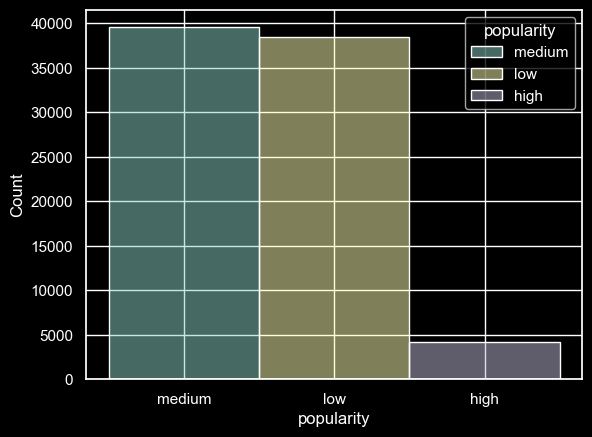

In [94]:
# Plot the distribution of each class
sns.histplot(data=df_class, x="popularity", hue="popularity")

# show the plot
plt.show()

I can see that the three classes are imbalanced, I prefer to perform oversampling rather than undersampling to not reduce the size of the dataset that is not very big

### Split train and test

In [95]:
# Define the dependent variable (y) and the independent variables (X)
y_class = df_class['popularity']
X_class = df_class.drop('popularity', axis=1)

# Let's check the results 
print(y_class)
print(X_class)

39463    medium
17586    medium
73441       low
51365    medium
73649       low
          ...  
80856    medium
26387       low
70175    medium
32730    medium
82357       low
Name: popularity, Length: 82177, dtype: object
       duration_ms  explicit  danceability   energy  key  loudness  mode  \
39463       160725      True         0.910  0.37400    8    -9.844     0   
17586       322933     False         0.269  0.51600    0    -7.361     1   
73441       515360     False         0.686  0.56000    5   -13.264     0   
51365       190203     False         0.679  0.77000    0    -3.537     1   
73649       331240     False         0.519  0.43100    6   -13.606     0   
...            ...       ...           ...      ...  ...       ...   ...   
80856       325156     False         0.766  0.38200    7   -11.464     0   
26387       109573     False         0.529  0.00879   10   -32.266     1   
70175       260573     False         0.423  0.36000    3    -9.458     1   
32730       23430

In [96]:
from sklearn.model_selection import train_test_split
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size = 0.25, random_state = 0)

In [97]:
X_train_class

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
42574,125226,False,0.341,0.9030,1,-14.599,1,0.0741,0.000163,0.890000,0.6060,0.2850,93.662,4,grindcore
38327,198485,False,0.444,0.6440,3,-9.469,1,0.0332,0.004050,0.047700,0.1030,0.8060,157.423,4,garage
113413,364053,False,0.358,0.7410,2,-6.633,1,0.0613,0.000167,0.000001,0.5550,0.0752,121.133,4,world-music
11475,193466,False,0.405,0.4630,0,-16.167,1,0.0542,0.003790,0.044200,0.3920,0.5420,79.451,4,british
4910,351186,False,0.254,0.2460,2,-14.722,0,0.0384,0.985000,0.882000,0.0983,0.1200,201.608,4,ambient
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45790,290133,False,0.712,0.0754,9,-22.393,1,0.0540,0.937000,0.730000,0.1120,0.3490,113.986,4,guitar
35907,126199,False,0.659,0.9440,9,-3.055,0,0.0574,0.433000,0.000002,0.1060,0.9170,172.052,4,forro
49340,147064,False,0.511,0.9600,8,-3.884,1,0.2900,0.144000,0.334000,0.3590,0.4390,152.587,4,hardstyle
24450,466413,False,0.726,0.5200,6,-11.816,1,0.0528,0.005620,0.866000,0.1090,0.3190,130.686,4,detroit-techno


### Encoding and scaling

In [98]:
df_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82177 entries, 39463 to 82357
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        82177 non-null  object 
 1   duration_ms       82177 non-null  int64  
 2   explicit          82177 non-null  bool   
 3   danceability      82177 non-null  float64
 4   energy            82177 non-null  float64
 5   key               82177 non-null  int64  
 6   loudness          82177 non-null  float64
 7   mode              82177 non-null  int64  
 8   speechiness       82177 non-null  float64
 9   acousticness      82177 non-null  float64
 10  instrumentalness  82177 non-null  float64
 11  liveness          82177 non-null  float64
 12  valence           82177 non-null  float64
 13  tempo             82177 non-null  float64
 14  time_signature    82177 non-null  int64  
 15  track_genre       82177 non-null  object 
dtypes: bool(1), float64(9), int64(4), ob

Let's encode the categorical variable "track_genre" using vaex

In [99]:
pd.DataFrame(X_train_class).columns

Index(['duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

In [100]:
# Convert the train and test column "track_genre" to Vaex 
X_train_class_vaex = vaex.from_pandas(pd.DataFrame(X_train_class["track_genre"]))
X_test_class_vaex = vaex.from_pandas(pd.DataFrame(X_test_class["track_genre"]))

# Encod the column through the MultiHotEncoder 
multi_hot_encoder_class = vaex.ml.MultiHotEncoder(features=["track_genre"], fill_value=0)

# fid and transform on the train but only transform on the test
X_train_class_vaex = multi_hot_encoder_class.fit_transform(X_train_class_vaex)
X_test_class_vaex = multi_hot_encoder_class.transform(X_test_class_vaex)

In [101]:
# Drop the "track_genre" original categorical variables from both sets
X_train_class = X_train_class.drop(["track_genre"], axis=1)
X_test_class = X_test_class.drop(["track_genre"], axis=1)

X_train_class.head()

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
42574,125226,False,0.341,0.903,1,-14.599,1,0.0741,0.000163,0.890000,0.6060,0.2850,93.662,4
38327,198485,False,0.444,0.644,3,-9.469,1,0.0332,0.004050,0.047700,0.1030,0.8060,157.423,4
113413,364053,False,0.358,0.741,2,-6.633,1,0.0613,0.000167,0.000001,0.5550,0.0752,121.133,4
11475,193466,False,0.405,0.463,0,-16.167,1,0.0542,0.003790,0.044200,0.3920,0.5420,79.451,4
4910,351186,False,0.254,0.246,2,-14.722,0,0.0384,0.985000,0.882000,0.0983,0.1200,201.608,4


In [102]:
# Reconvert the column from vaex to pandas
encoded_train_class = pd.DataFrame(X_train_class_vaex)
encoded_test_class = pd.DataFrame(X_test_class_vaex)

# Reset the index of the encoded train and test sets
encoded_train_class.reset_index(drop=True, inplace=True)
encoded_test_class.reset_index(drop=True, inplace=True)

# Concatenate only the train encoded set to the original one
X_train_class = pd.concat([encoded_train_class, X_train_class.reset_index(drop=True)], axis=1)
X_test_class = pd.concat([encoded_test_class, X_test_class.reset_index(drop=True)], axis=1)

# Let's see the results 
print(X_train_class)
print(X_test_class)

         0    1    2    3    4    5    6    7  duration_ms  explicit  ...  \
0      0.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0       125226     False  ...   
1      0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0       198485     False  ...   
2      0.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0       364053     False  ...   
3      0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0       193466     False  ...   
4      0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0       351186     False  ...   
...    ...  ...  ...  ...  ...  ...  ...  ...          ...       ...  ...   
61627  0.0  0.0  1.0  0.0  1.0  1.0  1.0  0.0       290133     False  ...   
61628  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0       126199     False  ...   
61629  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0       147064     False  ...   
61630  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0       466413     False  ...   
61631  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0       229355     False  ...   

       key  loudness  mode  speechiness  acousticness  instrumentalness  \


In [103]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from category_encoders import BinaryEncoder

# Convert all columns names to string, because ColumnTransformer expect all names as string type
# and from Vaex I have some columns with a name based on some integers
pd.DataFrame(X_train_class).columns = pd.DataFrame(X_train_class).columns.astype(str)
pd.DataFrame(X_test_class).columns = pd.DataFrame(X_test_class).columns.astype(str)

# Define column transformer
# I set in the encoder handle_unknown="ignore" to ensure In summary, 
# to preserve the observation of the author column
ct_class = ColumnTransformer(
    [('binary', BinaryEncoder(), ["explicit"]), 
     ('scale', MinMaxScaler(), ["duration_ms", "danceability", "key", "loudness",
                                  "speechiness", "acousticness", "valence", "tempo", "time_signature"])],
                                   remainder="passthrough")

X_train_class = ct_class.fit_transform(X_train_class)
X_test_class = ct_class.transform(X_test_class)

In [104]:
# Let's see if the preprocess has been performed correctly
print(pd.DataFrame(X_train_class).head())
print(pd.DataFrame(X_test_class).head())

    0         1         2         3         4         5         6         7   \
0  0.0  0.024399  0.346193  0.090909  0.663010  0.076788  0.000164  0.286432   
1  0.0  0.039724  0.450761  0.272727  0.760377  0.034404  0.004066  0.810050   
2  0.0  0.074359  0.363452  0.181818  0.814205  0.063523  0.000168  0.075578   
3  0.0  0.038674  0.411168  0.000000  0.633249  0.056166  0.003805  0.544724   
4  0.0  0.071667  0.257868  0.181818  0.660675  0.039793  0.988956  0.120603   

         8    9   ...   12   13   14   15   16   17     18   19        20  \
0  0.384851  0.8  ...  1.0  0.0  1.0  0.0  1.0  1.0  0.903  1.0  0.890000   
1  0.646841  0.8  ...  1.0  0.0  0.0  1.0  1.0  1.0  0.644  1.0  0.047700   
2  0.497728  0.8  ...  1.0  1.0  0.0  0.0  0.0  1.0  0.741  1.0  0.000001   
3  0.326459  0.8  ...  0.0  0.0  1.0  1.0  0.0  0.0  0.463  1.0  0.044200   
4  0.828394  0.8  ...  0.0  0.0  0.0  1.0  0.0  1.0  0.246  0.0  0.882000   

       21  
0  0.6060  
1  0.1030  
2  0.5550  
3  0.392

Encoding the new dependent variable

In [105]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


order = ['low', 'medium', 'high']
le.fit(order)
y_train_class = le.fit_transform(y_train_class)
y_test_class = le.transform(y_test_class)

In [106]:
y_train_class
y_test_class

array([2, 2, 2, ..., 2, 1, 2])

### Oversampling

In [109]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to oversample the minority classes in the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_class, y_train_class)

# Create a new DataFrame with the resampled training data
data_train_resampled = pd.concat([pd.DataFrame(X_train_resampled), pd.Series(y_train_resampled, name='popularity')], axis=1)

# Print the class distribution before and after oversampling in the training data
print('Training data - Class distribution before oversampling:')
print(pd.Series(y_train_class).value_counts())
print('\nTraining data - Class distribution after oversampling:')
print(data_train_resampled['popularity'].value_counts())

# Print the class distribution in the test data
print('\nTest data - Class distribution:')
print(pd.Series(y_test_class).value_counts())

Training data - Class distribution before oversampling:
2    29643
1    28808
0     3181
dtype: int64

Training data - Class distribution after oversampling:
1    29643
2    29643
0    29643
Name: popularity, dtype: int64

Test data - Class distribution:
2    9922
1    9625
0     998
dtype: int64


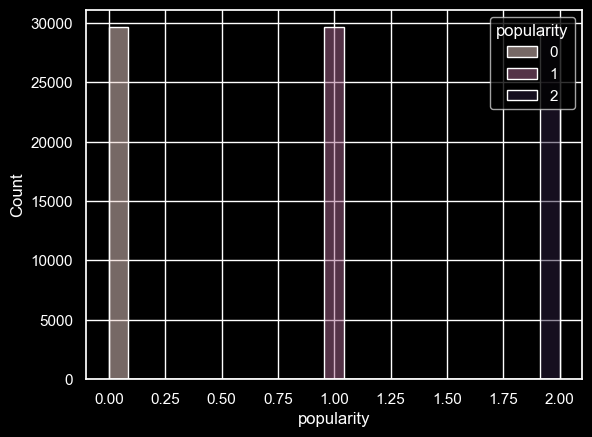

In [110]:
# Plot the distribution of each class after resampling
sns.histplot(data=data_train_resampled, x="popularity", hue="popularity")

# show the plot
plt.show()

### Build the model

Decision Tree

Accuracy on the train: 0.7331354226405334
Accuracy on the test: 0.579070333414456
Recall on the train: 0.7331354226405334
Recall on the test: 0.5964081750046585


<AxesSubplot: >

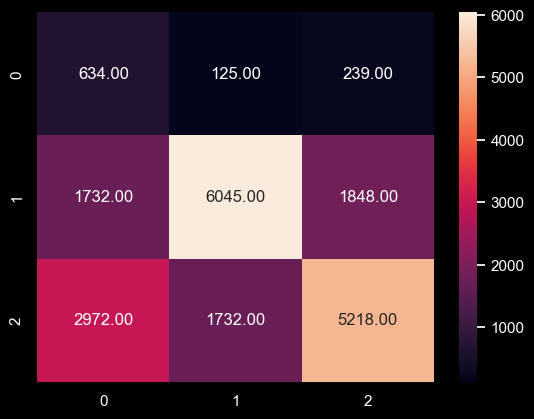

In [111]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

# Create a Decision Tree Classifier object
clf = DecisionTreeClassifier(max_depth=12)

# Train the classifier on the training data
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing data
y_train_pred = clf.predict(X_train_resampled)

# Make predictions on the testing data
y_test_pred = clf.predict(X_test_class)

# Calculate the accuracy of the classifier
accuracy_train = accuracy_score(y_train_resampled, y_train_pred)
accuracy_test = accuracy_score(y_test_class, y_test_pred)
print('Accuracy on the train:', accuracy_train)
print('Accuracy on the test:', accuracy_test)

# Calculate the recall
recall_train = recall_score(y_train_resampled, y_train_pred, average='macro')
recall_test = recall_score(y_test_class, y_test_pred, average='macro')
print('Recall on the train:', recall_train)
print('Recall on the test:', recall_test)

#Get the confusion matrix on the test set 
cm = confusion_matrix(y_test_class, y_test_pred)

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='.2f')

KNN

In [112]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Instantiate a KNN classifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=40)

# Train the classifier on the training set
knn.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing data
y_train_pred = knn.predict(X_train_resampled)

# Make predictions on the testing data
y_test_pred = knn.predict(X_test_class)

# Calculate the accuracy of the classifier
accuracy_train = accuracy_score(y_train_resampled, y_train_pred)
accuracy_test = accuracy_score(y_test_class, y_test_pred)
print('Accuracy on the train:', accuracy_train)
print('Accuracy on the test:', accuracy_test)

Accuracy on the train: 0.7646999291569679
Accuracy on the test: 0.6663421757118521


Random forest

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the random forest classifier
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 5, 10],
    
}

# Define the grid search object with cross-validation
grid_search = GridSearchCV(
    rf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the grid search object to the resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

/Users/leo/opt/anaconda3/envs/datavis/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best score:  0.8378032461083178


Accuracy on the train: 0.6644064365954863
Accuracy on the test: 0.5503042102701388
Recall on the train: 0.6644064365954864
Recall on the test: 0.5859672595014854


<AxesSubplot: >

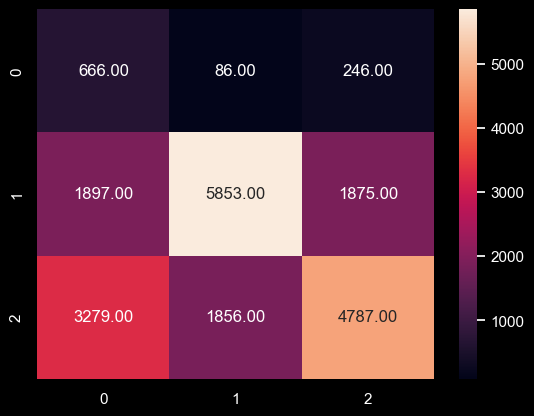

In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest Classifier object
rf = RandomForestClassifier(n_estimators=150, criterion= "gini", max_depth=8, min_samples_split = 5, random_state=42)

# Train the classifier on the training data
rf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing data
y_train_pred = rf.predict(X_train_resampled)

# Make predictions on the testing data
y_test_pred = rf.predict(X_test_class)

# Calculate the accuracy of the classifier
accuracy_train = accuracy_score(y_train_resampled, y_train_pred)
accuracy_test = accuracy_score(y_test_class, y_test_pred)
print('Accuracy on the train:', accuracy_train)
print('Accuracy on the test:', accuracy_test)

# Calculate the recall
recall_train = recall_score(y_train_resampled, y_train_pred, average='macro')
recall_test = recall_score(y_test_class, y_test_pred, average='macro')
print('Recall on the train:', recall_train)
print('Recall on the test:', recall_test)

#Get the confusion matrix on the test set 
cm = confusion_matrix(y_test_class, y_test_pred)

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='.2f')

XGBoost

In [115]:
from sklearn.utils.extmath import softmax
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Create an XGBoost classifier
XGB = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the hyperparameters for the grid search
params = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [5, 7],
    'n_estimators': [100, 200],
    }

# Perform the grid search using the train and test set
grid_search = GridSearchCV(XGB, params, scoring='accuracy', cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best hyperparameters:", best_params)
print(f"Best accuracy on the train set (cross-validated): {best_score:.4f}")

# Evaluate the model with the best hyperparameters on the test set
y_test_pred = grid_search.predict(X_test_class)
accuracy_test = accuracy_score(y_test_class, y_test_pred)

print(f"Accuracy on the test set: {accuracy_test:.4f}")

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/Users/leo/opt/anaconda3/envs/datavis/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/leo/opt/anaconda3/envs/datavis/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/leo/opt/anaconda3/envs/datavis/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best accuracy on the train set (cross-validated): 0.8018
Accuracy on the test set: 0.7479


Accuracy on the train: 0.8697725151525374
Accuracy on the test: 0.747870528109029
Recall on the train: 0.8697725151525374
Recall on the test: 0.6061640657419888


<AxesSubplot: >

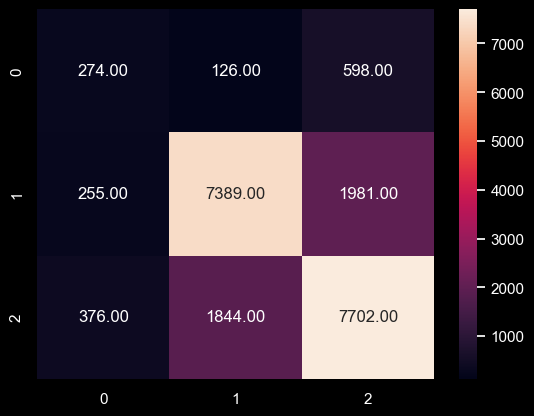

In [116]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Fit model on training data
XGB = XGBClassifier(objective='multi:softmax', num_class=3, learning_rate=0.1, 
                    max_depth=7, n_estimators=200, reg_lambda=1)
XGB.fit(X_train_resampled, y_train_resampled)

# Make predictions for train data
y_train_pred = XGB.predict(X_train_resampled)

# Make predictions for test data
y_test_pred = XGB.predict(X_test_class)

# Calculate the accuracy of the classifier
accuracy_train = accuracy_score(y_train_resampled, y_train_pred)
accuracy_test = accuracy_score(y_test_class, y_test_pred)
print('Accuracy on the train:', accuracy_train)
print('Accuracy on the test:', accuracy_test)

# Calculate the recall
recall_train = recall_score(y_train_resampled, y_train_pred, average='macro')
recall_test = recall_score(y_test_class, y_test_pred, average='macro')
print('Recall on the train:', recall_train)
print('Recall on the test:', recall_test)

#Get the confusion matrix on the test set 
cm = confusion_matrix(y_test_class, y_test_pred)

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='.2f')

Neural Network

In [117]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.optimizers import Adam
# from tensorflow import keras
# from tensorflow.keras import layers

# # Define model
# model = keras.models.Sequential()
# model.add(layers.Dense(64, activation='relu', input_shape=(55,)))
# model.add(layers.Dropout(0.3))
# model.add(layers.Dense(32, activation='relu'))
# model.add(layers.Dropout(0.3))
# model.add(layers.Dense(3, activation='softmax'))

In [118]:
# # Compile the model
# model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Train the model
# history = model.fit(X_train_resampled, y_train_resampled, epochs=100, batch_size=18, verbose=1)

In [119]:
# score = model.evaluate(X_test_class, y_test_class, verbose=0)
# print("Test loss:", score[0])
# print("Test accuracy:", score[1])

NameError: name 'model' is not defined